# **MACHINE LEARNING - THE FINAL PROJECT**

***Group 2:***

Dinh Long Huynh

Gustav Gauffin

Saaransh Saxena

Jinming Zhang




***TABLE OF CONTENTS***

0. IMPORTING PACKAGES, LIBRARIES, AND FUNCTIONS
1. EXAMINE THE DATASET
2. MULTIPLE LINEAR REGRESSION
3. K-NEAREST NEIGHBORS REGRESSION
4. RANDOM FOREST REGRESSION
5. COMPARISION OF MODELS
6. CONFORMAL ANALYSIS
7. FILTERING DATA
8. PCP DATASET
9. MF DATASET
10. MFPCP DATASET
11. COMPARISON BETWEEN PCP, MF, AND MFPCP MODELS





# **IMPORT PACKAGES, LIBRARIES, AND FUNCTIONS**
In this part, we imported all the neccessary packages, libraries, and functions for the project

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import t
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
import pylab as py
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, PandasTools, Descriptors
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import IPythonConsole

# **1. EXAMINE THE DATASET**
This part included importing and handling the data set, such as dropping the redundant columns and standardizing the numerical data.

Then, we also examined the distribution of descriptors and target values, as well as the correlation between all of them.

**1.1. Importing and handling dataset**



In [7]:
# Loading dataset
df_1 = pd.read_csv('/Users/lod/Desktop/curated-solubility-dataset-1.csv')
df_raw = df_1

# Dropping redundant columns
df_drop = df_raw.drop(['ID','Name','InChI','InChIKey','SMILES','Group','Ocurrences','SD'], axis = 1)

# Standardized dataset
scaler = StandardScaler()
df_standard = scaler.fit_transform(df_drop)
df_standard = pd.DataFrame(df_standard, columns = df_drop.columns)
df_standard

,Solubility,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,-0.050942,0.299232,0.266845,0.333121,0.148984,-0.799738,-0.601501,-0.503979,1.144191,0.315304,-0.596995,-0.336433,-0.434172,-0.727944,-0.806740,0.255201,-1.478684,-0.380519
1,0.109473,-0.514806,-0.041725,-0.373255,-0.398650,-0.582536,0.070567,-0.503979,-0.662035,-0.498659,0.552731,-0.336433,0.586209,0.763744,-0.444656,-0.481952,0.390220,-0.007614
2,0.587880,-0.619105,-0.092008,-0.583748,-0.617704,-0.582536,-0.601501,-0.503979,-0.555786,-0.661452,-0.022132,-0.336433,-0.434172,-0.230714,-0.594342,-0.631638,0.699017,-0.390084
3,-0.187795,1.624995,1.093225,1.706418,1.791885,0.503475,0.742636,0.280424,0.400451,1.556598,2.852182,-0.336433,-0.434172,2.255432,0.695350,1.716776,-1.478684,1.793895
4,-0.515254,0.408638,-0.025845,0.565541,0.587091,0.503475,-0.601501,0.123544,0.612948,0.539144,0.552731,4.713212,3.647355,2.255432,-0.102480,0.473353,-0.694056,0.313007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.689726,1.162628,-1.474732,0.693828,0.915671,1.589485,1.414705,1.849231,0.081705,0.742635,-0.022132,-0.336433,1.606591,0.763744,1.644359,1.195914,-1.478681,1.274161
1996,0.734348,0.678368,0.331978,0.704976,0.806144,0.937879,-0.601501,0.751066,0.081705,0.620540,1.702456,-0.336433,-0.434172,1.260973,0.635003,0.846524,-1.478681,1.244543
1997,1.012910,-0.708398,-0.577083,-0.757433,-0.672467,-0.365334,0.742636,-0.190218,-0.449538,-0.681801,-0.596995,-0.336433,-0.434172,-0.727944,0.121490,-0.748443,1.175718,-0.493814
1998,0.886752,-0.317488,-0.209163,-0.165686,-0.234360,-0.148132,0.742636,-0.347098,-0.130792,-0.213772,-0.022132,-0.336433,-0.434172,-0.230714,-0.262992,-0.286019,0.533565,-0.274126


**1.2. Examining the dataset**

To examine the dataset, we used the df_drop, which is the data without standardized. This is because we want to access the original data to have a very first insight with each feature and target value.



First, we take a look on the target value, which is Solubility.

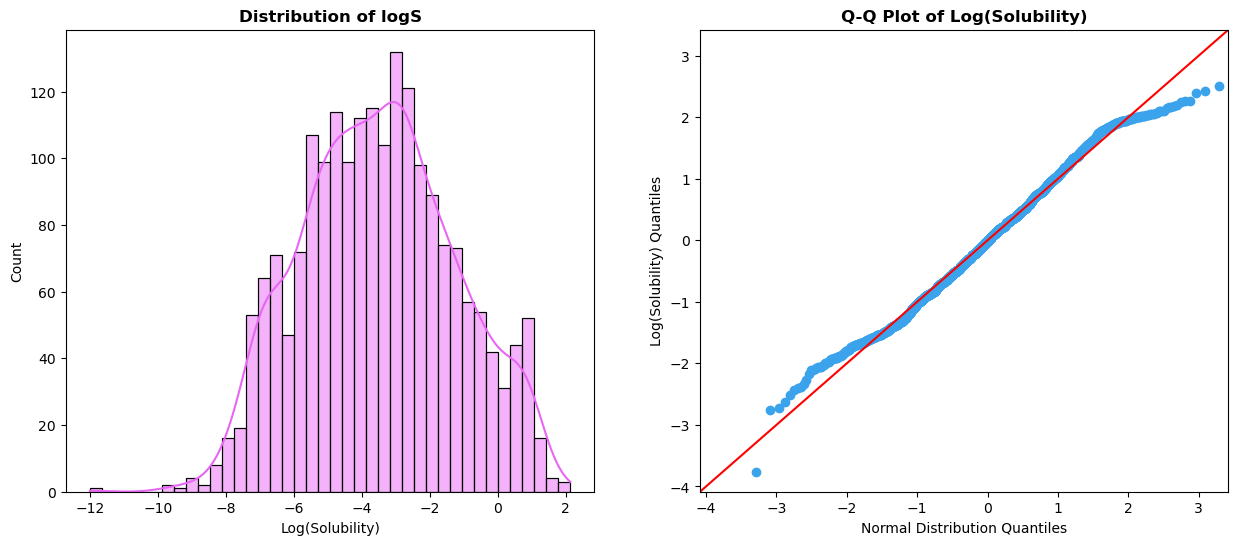

In [8]:
palette = sns.color_palette("husl")

fig, ax = plt.subplots(1,2, figsize = (15,6))
# Distribution of solubility
sns.histplot(df_raw['Solubility'], color = palette[5],bins=40,kde=True, ax = ax[0])
ax[0].set_xlabel('Log(Solubility)')
ax[0].set_title('Distribution of logS', weight = 'bold')

# Q-Q plot of solubility
sm.qqplot(df_standard['Solubility'], line = '45', ax = ax[1], markeredgecolor=palette[4], markerfacecolor=palette[4])
ax[1].set_ylabel('Log(Solubility) Quantiles')
ax[1].set_xlabel('Normal Distribution Quantiles')
ax[1].set_title('Q-Q Plot of Log(Solubility)', weight = 'bold')

plt.show()


In [9]:
ax[1].set_ylabel('Log(Solubility) Quantiles')# Number of low solubility compounds
low_solubility = df_raw[df_raw['Solubility']<=0]
low_solubility_ratio = (low_solubility.shape[0]/df_raw.shape[0])*100
print(f"The percentage of low solubility compounds is {low_solubility_ratio}%")

The percentage of low solubility compounds is 92.4%


Second, we take a look on the Linpinski's Features, which strongly affect the solubility.


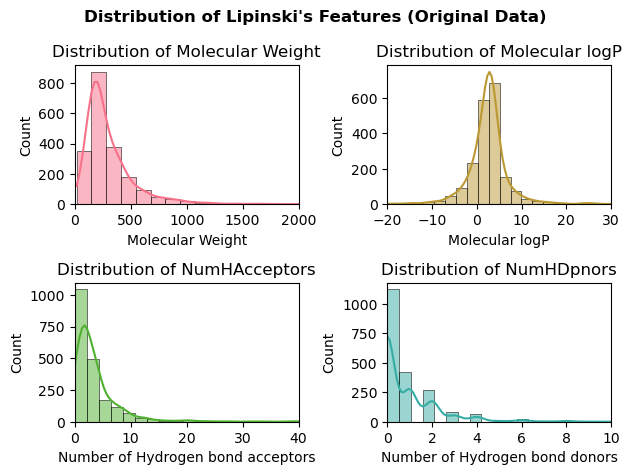

In [5]:
# Distribution of several features
def histogram_original(row, col, feature, palette, x_label, title, start, end):
  sns.histplot(df_raw[feature], color=palette, bins=40, ax=ax[row, col], kde = True)
  ax[row, col].set_xlabel(x_label)
  ax[row, col].set_title(title)
  ax[row, col].set_xlim(start, end)


fig, ax = plt.subplots(2,2)
histogram_original(0, 0, 'MolWt', palette[0], 'Molecular Weight', 'Distribution of Molecular Weight', 0, 2000)
histogram_original(0, 1, 'MolLogP', palette[1],'Molecular logP', 'Distribution of Molecular logP', -20, 30)
histogram_original(1, 0, 'NumHAcceptors', palette[2], 'Number of Hydrogen bond acceptors', 'Distribution of NumHAcceptors', 0, 40)
histogram_original(1, 1, 'NumHDonors', palette[3],'Number of Hydrogen bond donors', 'Distribution of NumHDpnors', 0, 10)
fig.suptitle("Distribution of Lipinski's Features (Original Data)", weight = 'bold')
plt.tight_layout()
plt.show()

In [7]:
# Number of compounds following Linpinski Rules
Lipinski = df_raw[(df_raw['MolWt']<=500) & (df_raw['MolLogP']<=5)]
Lipinski = Lipinski[(Lipinski['NumHAcceptors']<=10)& (Lipinski['NumHDonors']<=5)]
Lipinski_ratio = round((Lipinski.shape[0]/df_raw.shape[0])*100,1)
print(f"The percentage of compounds following Lipinski's Rules is {Lipinski_ratio}%")

The percentage of compounds following Lipinski's Rules is 76.6%


Third, we take a look on all the remaining features, to see how they are distributed


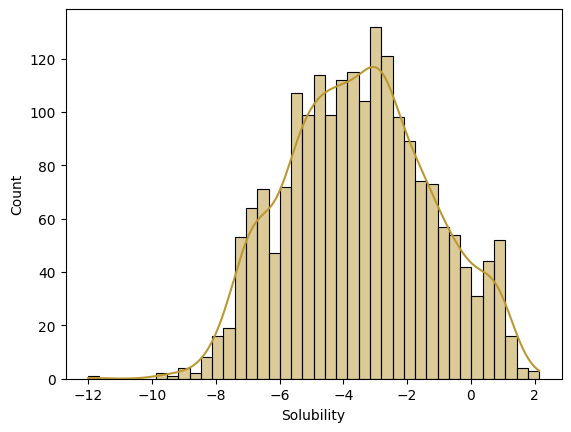

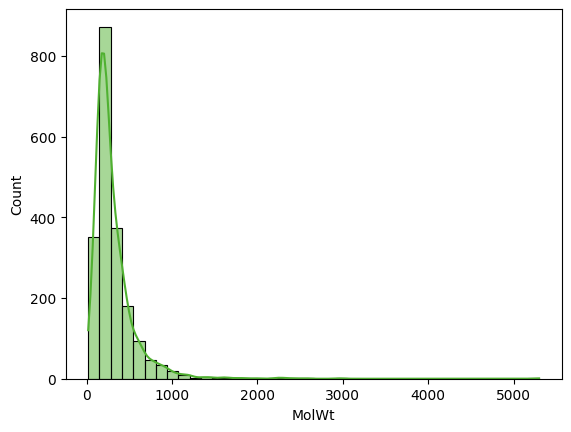

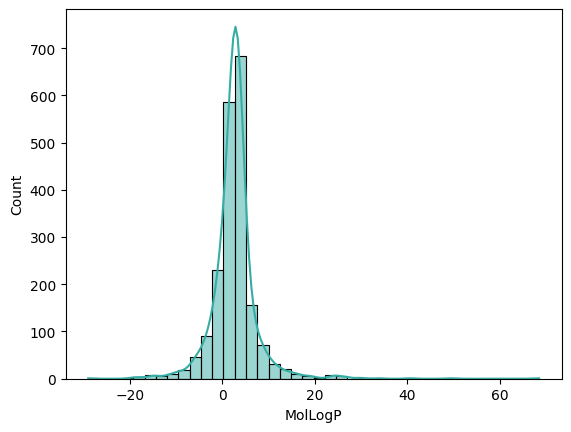

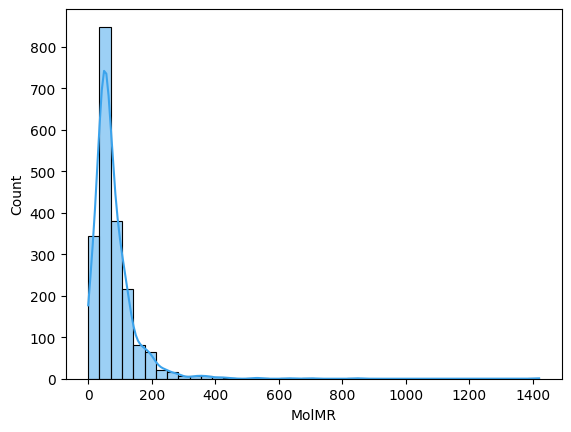

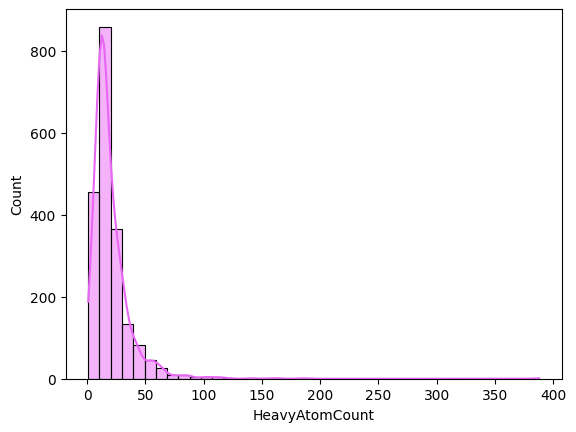

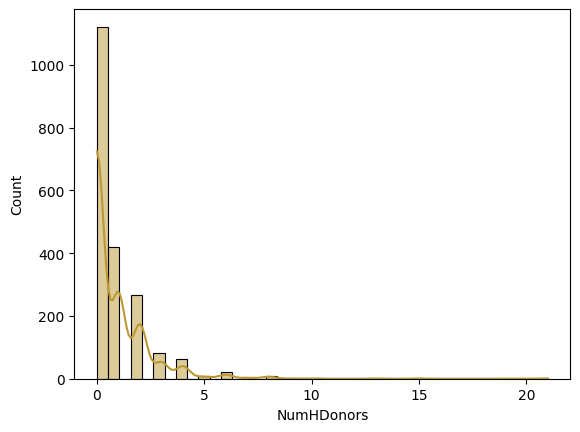

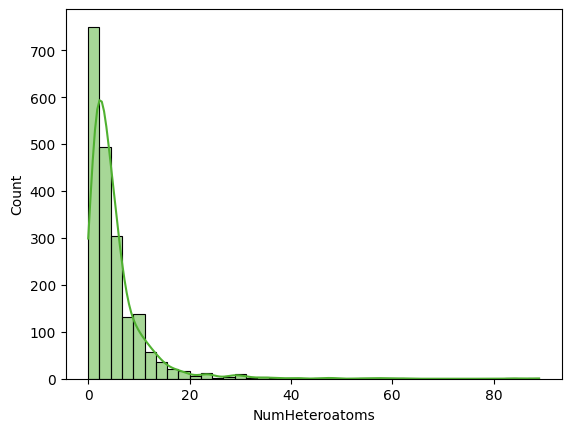

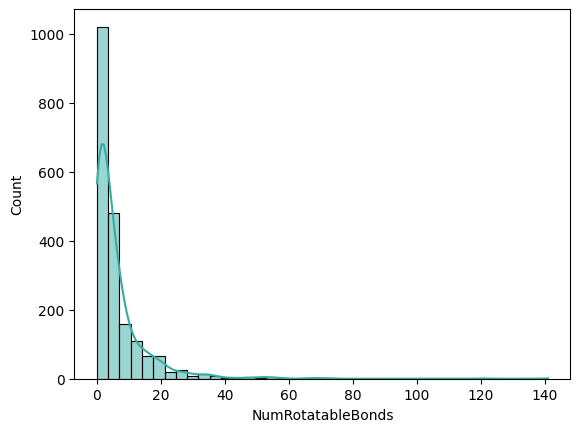

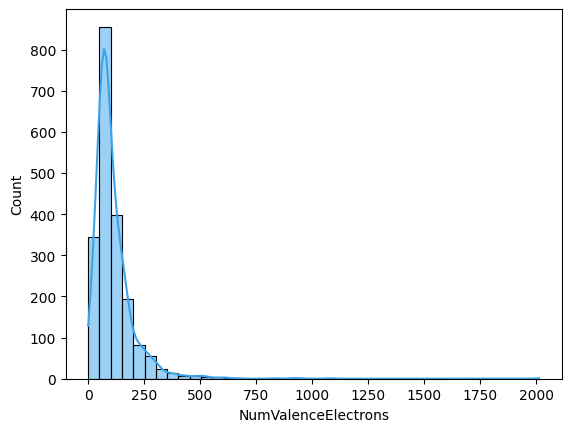

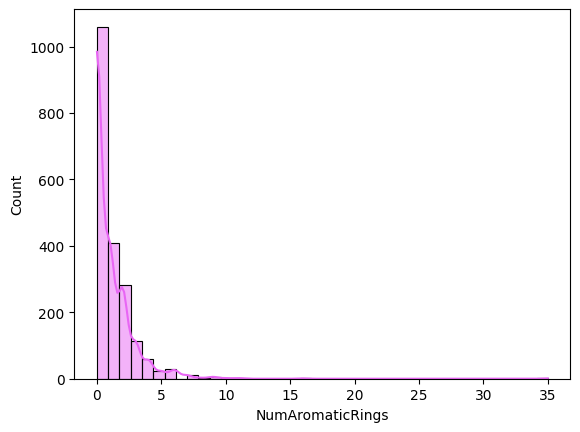

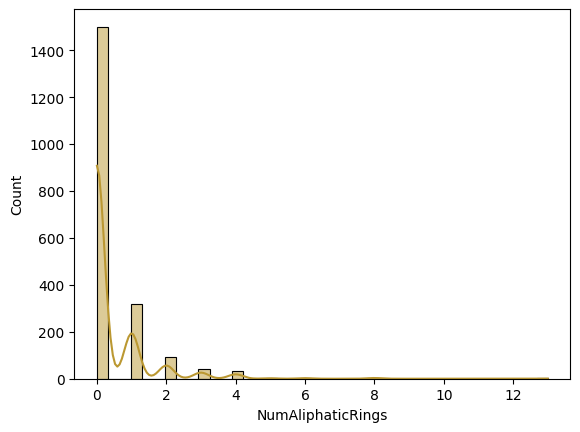

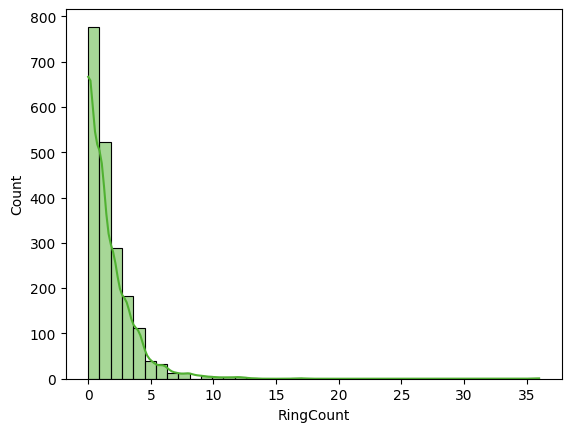

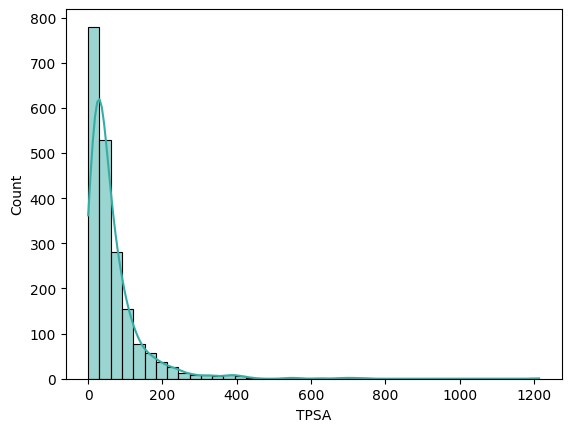

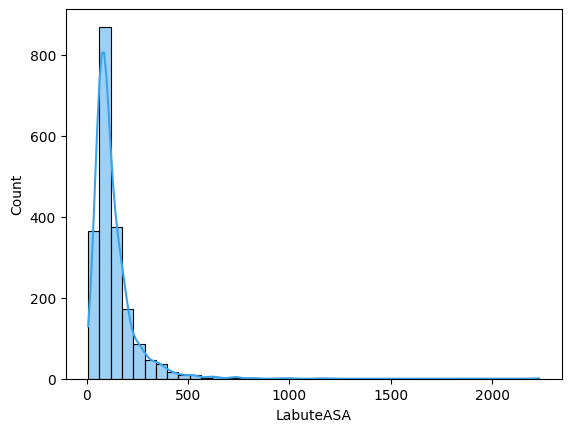

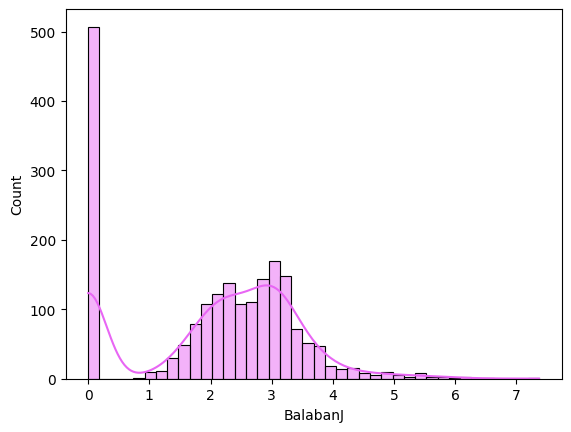

In [ ]:
color = 0
for feature in df_drop.columns:
  color += 1
  if color <=5:
    sns.histplot(df_drop[feature], color = palette[color],bins=40,kde=True)
    plt.show()
  else:
    color = 0

Finally, we examine the correlation relationship between each pair of all features.

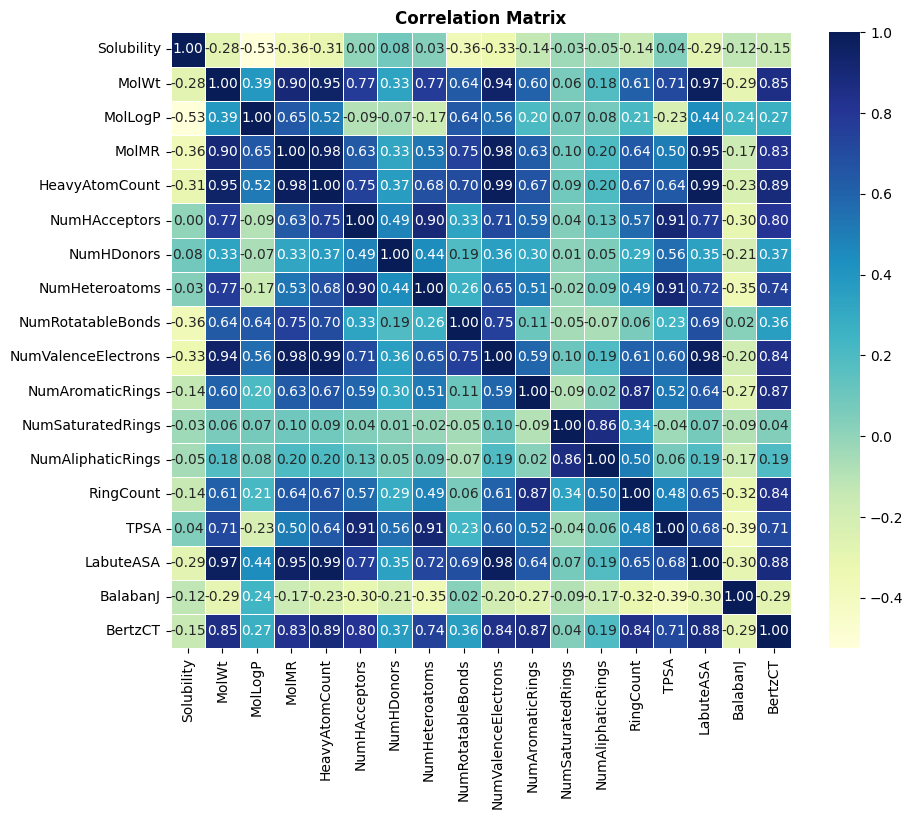

In [ ]:
# Check the correlation of feature
correlation_matrix = df_standard.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', weight = "bold")
plt.show()

# **2. MULTIPLE LINEAR REGRESSION**

In this part, we use the Multiple Linear Regression (MLR) model for predicting solubility.

Then we also introduce two Feature Selection Methods aiming to improve the accuracy of regression model

In [14]:
# Spliting data for building model
X = df_standard.drop('Solubility', axis = 1)
Y = df_standard['Solubility']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
x_train, x_calibrate, y_train, y_calibrate = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 42)

The data was split by 2 ways: the training set and the testing set. We did't have the independent validating set because we used cross-validation for calculating the evaluation scores.

**2.1. MLR WITH ALL FEATURES**

Beside MLR, we also run the cross-validation to find the uncertainty of the model.

In [6]:
#Run cross validation with Linear Regression
grid_model = GridSearchCV(LinearRegression(),cv=10, param_grid = {}, scoring={
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mse': make_scorer(mean_squared_error)
    }, refit='r2')
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LinearRegression(), param_grid={}, refit='r2',
             scoring={'mae': make_scorer(mean_absolute_error),
                      'mse': make_scorer(mean_squared_error),
                      'r2': make_scorer(r2_score)})

In [7]:
mean_MAE = grid_model.cv_results_['mean_test_mae']
std_MAE = grid_model.cv_results_['std_test_mae']
CI_MAE = 1.96*std_MAE/np.sqrt(10)

mean_RMSE = np.sqrt(grid_model.cv_results_['mean_test_mse'])
std_RMSE = grid_model.cv_results_['std_test_mae']/(2 * np.sqrt(grid_model.cv_results_['mean_test_mse']))
CI_RMSE = 1.96*std_RMSE/np.sqrt(10)


mean_R2 = grid_model.cv_results_['mean_test_r2']
std_R2 = grid_model.cv_results_['std_test_r2']
CI_R2 = 1.96*std_R2/np.sqrt(10)

In [8]:
print(f'MAE: mean {mean_MAE} and 95% CI range {CI_MAE}' )
print(f'RMSE: mean {mean_RMSE} and 95% CI range {CI_RMSE}')
print(f'R2: mean {mean_R2} and 95% CI range {CI_R2}')

MAE: mean [0.62568344] and 95% CI range [0.02154761]
RMSE: mean [0.81864589] and 95% CI range [0.01316052]
R2: mean [0.31848972] and 95% CI range [0.12642357]


**2.2. MLR WITH CORRELATED_BASE FEATURE SELECTION**

In this part, we test several cut-off threshold of Pearson Correlation Coefficients to see which cut-off threshold is the best, given highest prediction accuracy

In [ ]:
RMSE = []
R2 = []
MAE = []
RMSE_max = []
RMSE_min = []
RMSE_mean = []
R2_max = []
R2_min = []
R2_mean = []
MAE_max = []
MAE_min = []
MAE_mean = []
threshold_range = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.975, 1]
for k in threshold_range:
  time = 0
  while time <= 10:
    time += 1
    x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, test_size = 0.1)
  # Filter out high correlation features
    threshold = k
    correlated_features = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.append(colname)

    x_train_filtered = x_train.drop(columns=correlated_features, axis=1)
    x_validate_filtered = x_validate.drop(columns=correlated_features, axis=1)

  # Run LinearRegression
    linear_model = LinearRegression()
    linear_model.fit(x_train_filtered, y_train)

  # Predict
    prediction = linear_model.predict(x_validate_filtered)

  # RMSE extract
    rmse_score = np.sqrt(mean_squared_error(y_true = y_validate, y_pred = prediction))
    RMSE.append(rmse_score)

  # R2 extract
    R2.append(r2_score(y_true = y_validate, y_pred = prediction))

  # MAE extract
    MAE.append(mean_absolute_error(y_true = y_validate, y_pred = prediction))

  lower_bound_RMSE, upper_bound_RMSE = t.interval(0.95, len(RMSE)-1, loc=np.mean(RMSE), scale = np.std(RMSE, ddof=1)/np.sqrt(len(RMSE)))

  lower_bound_R2, upper_bound_R2 = t.interval(0.95, len(R2)-1, loc=np.mean(R2), scale = np.std(R2, ddof=1)/np.sqrt(len(R2)))

  lower_bound_MAE, upper_bound_MAE = t.interval(0.95, len(MAE)-1, loc=np.mean(MAE), scale = np.std(MAE, ddof=1)/np.sqrt(len(MAE)))

  RMSE_max.append(upper_bound_RMSE)
  RMSE_mean.append(np.mean(RMSE))
  RMSE_min.append(lower_bound_RMSE)

  R2_max.append(upper_bound_R2)
  R2_mean.append(np.mean(R2))
  R2_min.append(lower_bound_R2)

  MAE_max.append(upper_bound_MAE)
  MAE_mean.append(np.mean(MAE))
  MAE_min.append(lower_bound_MAE)

  RMSE = []
  R2 =[]
  MAE = []

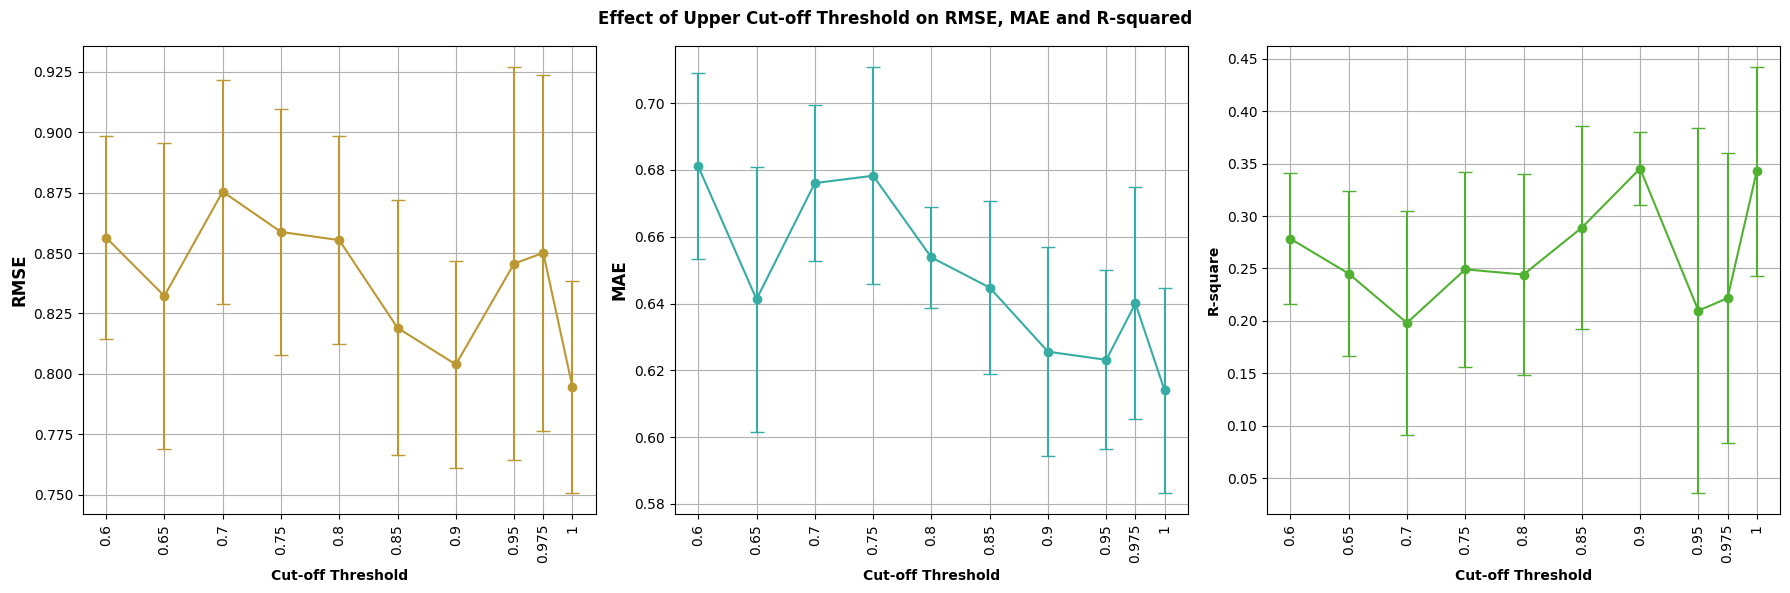

In [ ]:
# Visualize
fig, ax = plt.subplots(1,3,figsize=(18, 6))

# Create ax for RMSE
ax[0].errorbar(threshold_range, RMSE_mean, yerr=[np.subtract(RMSE_mean, RMSE_min), np.subtract(RMSE_max, RMSE_mean)],
             fmt='o-', label='RMSE', color = palette[1], capsize = 5)


# Customize labels and title
ax[0].set_xlabel('Cut-off Threshold', weight='bold')
ax[0].set_ylabel('RMSE', fontsize=12, weight='bold')
ax[0].grid(True)
ax[0].set_xticks(threshold_range)
ax[0].set_xticklabels(threshold_range, rotation=90)

# Create ax for R2
ax[2].errorbar(threshold_range, R2_mean, yerr=[np.subtract(R2_mean, R2_min), np.subtract(R2_max, R2_mean)],
             fmt='o-', label='RMSE',color = palette[2], capsize = 5)

# Customize labels and title
ax[2].set_xlabel('Cut-off Threshold', weight='bold')
ax[2].set_ylabel('R-square',weight='bold')
ax[2].grid(True)
ax[2].set_xticks(threshold_range)
ax[2].set_xticklabels(threshold_range, rotation=90)

# Create ax for MAE
ax[1].errorbar(threshold_range, MAE_mean, yerr=[np.subtract(MAE_mean, MAE_min), np.subtract(MAE_max, MAE_mean)],
             fmt='o-', label='MAE', color = palette[3], capsize = 5)


# Customize labels and title
ax[1].set_xlabel('Cut-off Threshold', weight='bold')
ax[1].set_ylabel('MAE', fontsize=12, weight='bold')
ax[1].grid(True)
ax[1].set_xticks(threshold_range)
ax[1].set_xticklabels(threshold_range, rotation=90)


fig.suptitle('Effect of Upper Cut-off Threshold on RMSE, MAE and R-squared',weight='bold')
plt.tight_layout()
plt.show()

**2.3. MLR WITH SELECT K BEST FETURES**

In this part, we try eliminating the insignificant variables and remaining k most important ones. We also test with many value of k to find the best one, given the highest accuracy

In [ ]:
no_features = range(1,18)

# Use GridSearchCV
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_regression)),
    ('regression', LinearRegression())
])


# Define the parameter grid for GridSearchCV
param_grid = {'feature_selection__k': no_features}

# Create the GridSearchCV for RMSE
grid_search_model = GridSearchCV(pipeline, param_grid=param_grid, cv=10, scoring={
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mse': make_scorer(mean_squared_error)
    }, refit = False)
grid_search_model.fit(X_train, Y_train)

# Extract R2 from grid_search_model
mean_R2 = grid_search_model.cv_results_['mean_test_r2']

std_R2 = grid_search_model.cv_results_['std_test_r2']

range_95CI_R2 =  1.96*std_R2/np.sqrt(10)

# Extract MAE from grid_search_model
mean_MAE = grid_search_model.cv_results_['mean_test_mae']

std_MAE = grid_search_model.cv_results_['std_test_mae']

range_95CI_MAE =  1.96*std_MAE/np.sqrt(10)

# Extract RMSE from grid_search_model
mean_MSE = grid_search_model.cv_results_['mean_test_mse']
mean_RMSE = np.sqrt(mean_MSE)

std_MSE = grid_search_model.cv_results_['std_test_mse']
std_RMSE = std_MSE / (2 * np.sqrt(mean_MSE))

range_95CI_RMSE =  1.96*std_RMSE/np.sqrt(10)



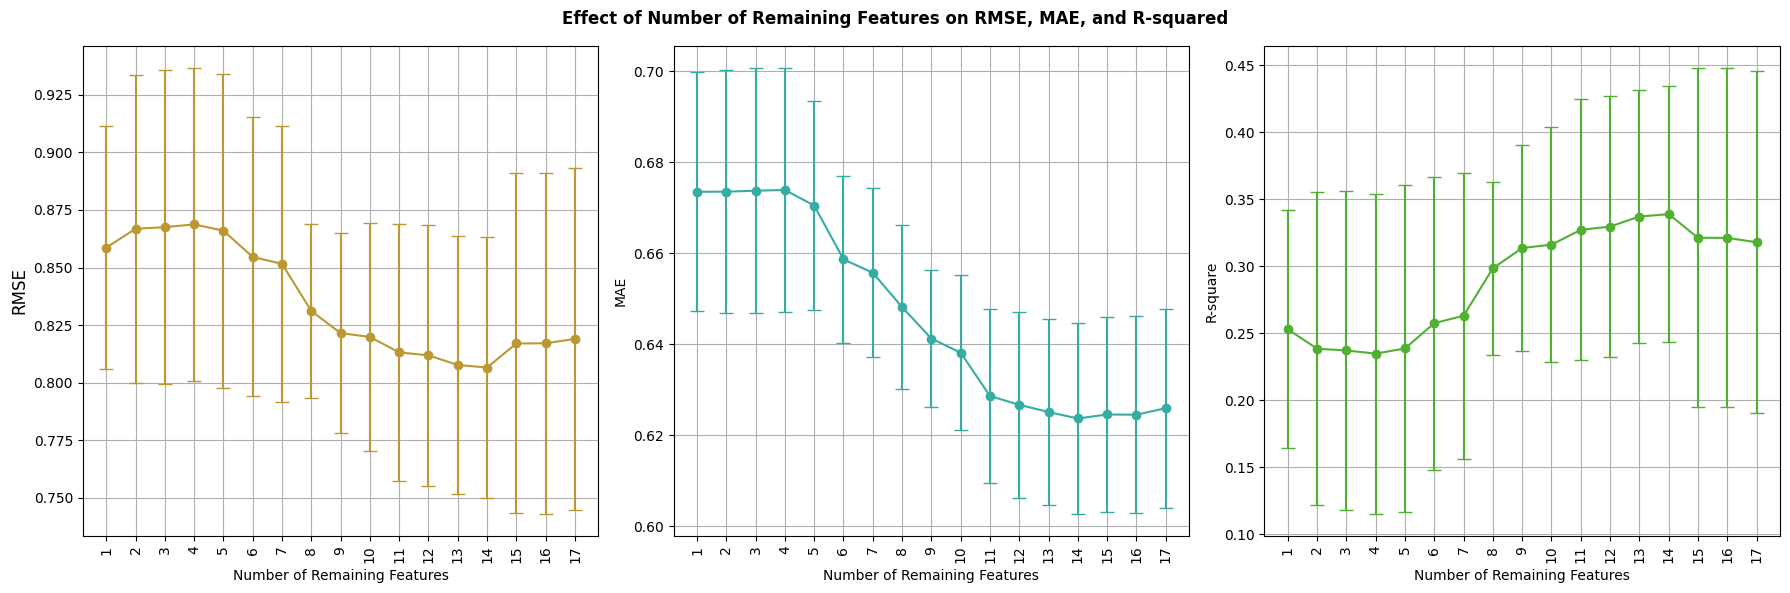

In [ ]:
# Visualize
fig, ax = plt.subplots(1,3,figsize=(18, 6))

# Create ax for RMSE
ax[0].errorbar(no_features, mean_RMSE, yerr= range_95CI_RMSE,
             fmt='o-', label='RMSE', color = palette[1], capsize = 5)


# Customize labels and title
ax[0].set_xlabel('Number of Remaining Features')
ax[0].set_ylabel('RMSE', fontsize=12)
ax[0].grid(True)
ax[0].set_xticks(no_features)
ax[0].set_xticklabels(no_features, rotation=90)

# Create ax for R2
ax[2].errorbar(no_features, mean_R2, yerr= range_95CI_R2,
             fmt='o-', label='R2',color = palette[2], capsize = 5)

# Customize labels and title
ax[2].set_xlabel('Number of Remaining Features')
ax[2].set_ylabel('R-square')
ax[2].grid(True)
ax[2].set_xticks(no_features)
ax[2].set_xticklabels(no_features, rotation=90)

#Create ax for MAE
ax[1].errorbar(no_features, mean_MAE, yerr= range_95CI_MAE,
             fmt='o-', label='MAE',color = palette[3], capsize = 5)

# Customize labels and title
ax[1].set_xlabel('Number of Remaining Features')
ax[1].set_ylabel('MAE')
ax[1].grid(True)
ax[1].set_xticks(no_features)
ax[1].set_xticklabels(no_features, rotation=90)

fig.suptitle('Effect of Number of Remaining Features on RMSE, MAE, and R-squared', weight = "bold")
plt.tight_layout()
plt.show()

# **3. K-NEAREST NEIGHBORS REGRESSION**
In this part, we used the K-Nearest Neighbor (KNN) model for predicting solubility. To obtain the highest accuracy, we performed cross-validation to find the best number of neighbors.

In [ ]:
no_neighbors = range(2,30)

# Use GridSearchCV
param = {'n_neighbors':no_neighbors}

# Create GridSearch
grid_search_model = GridSearchCV(KNeighborsRegressor(), param_grid=param, cv=10, scoring={
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mse': make_scorer(mean_squared_error)
    }, refit = False)
grid_search_model.fit(X_train, Y_train)

# Extract R2 from grid_search_model
mean_R2 = grid_search_model.cv_results_['mean_test_r2']

std_R2 = grid_search_model.cv_results_['std_test_r2']

range_95CI_R2 =  1.96*std_R2/np.sqrt(10)

# Extract MAE from grid_search_model
mean_MAE = grid_search_model.cv_results_['mean_test_mae']

std_MAE = grid_search_model.cv_results_['std_test_mae']

range_95CI_MAE =  1.96*std_MAE/np.sqrt(10)

# Extract RMSE from grid_search_model
mean_MSE = grid_search_model.cv_results_['mean_test_mse']
mean_RMSE = np.sqrt(mean_MSE)

std_MSE = grid_search_model.cv_results_['std_test_mse']
std_RMSE = std_MSE / (2 * np.sqrt(mean_MSE))

range_95CI_RMSE =  1.96*std_RMSE/np.sqrt(10)


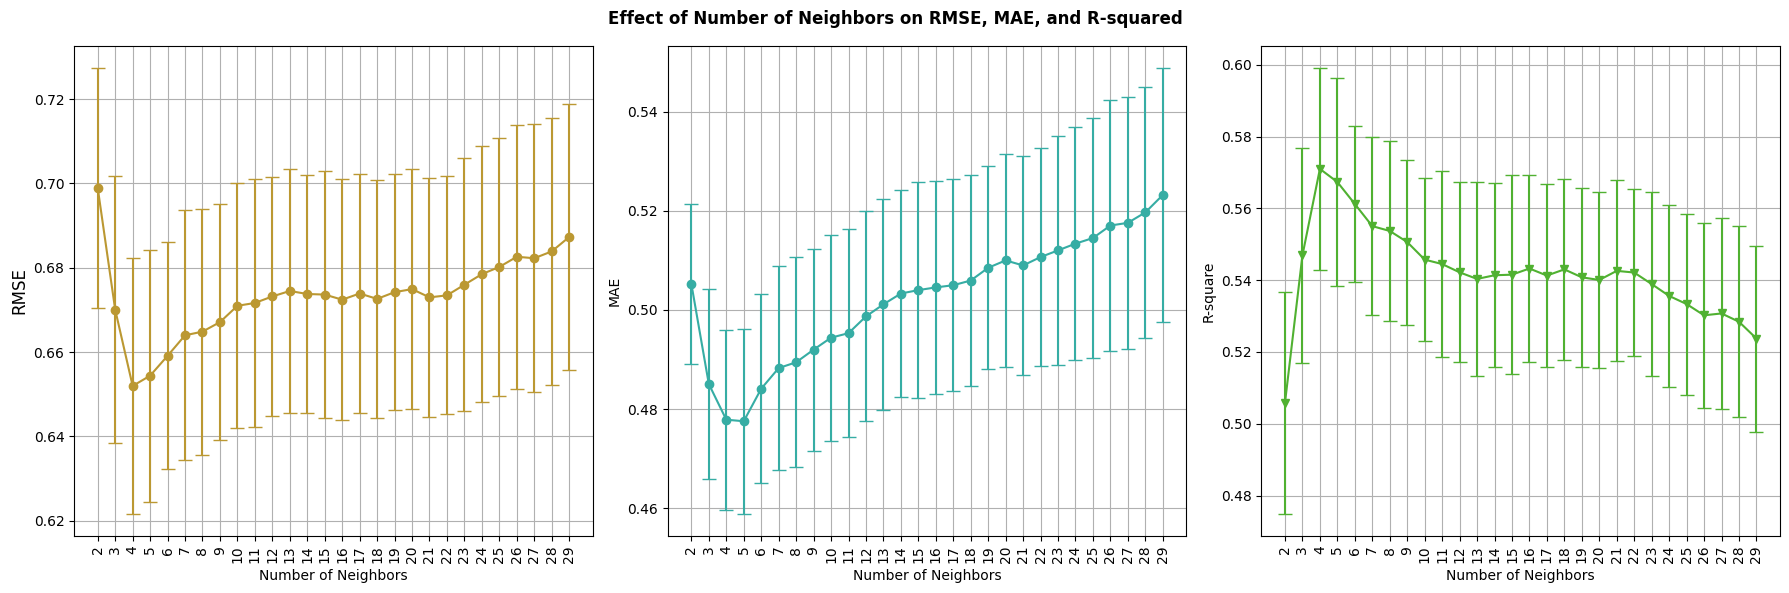

In [ ]:
# Visualize
fig, ax = plt.subplots(1,3,figsize=(18, 6))

# Use a vibrant color palette, for example, "viridis"
ax[0].errorbar(no_neighbors, mean_RMSE, yerr= range_95CI_RMSE,
             fmt='o-', label='RMSE', color = palette[1], capsize = 5)


# Customize labels and title
ax[0].set_xlabel('Number of Neighbors')
ax[0].set_ylabel('RMSE', fontsize=12)
ax[0].grid(True)
ax[0].set_xticks(no_neighbors)
ax[0].set_xticklabels(no_neighbors, rotation=90)

# Use a vibrant color palette, for example, "viridis"
ax[2].errorbar(no_neighbors, mean_R2, yerr= range_95CI_R2,
             fmt='v-', label='R2',color = palette[2], capsize = 5)

# Customize labels and title
ax[2].set_xlabel('Number of Neighbors')
ax[2].set_ylabel('R-square')
ax[2].grid(True)
ax[2].set_xticks(no_neighbors)
ax[2].set_xticklabels(no_neighbors, rotation=90)


#Create ax for MAE
ax[1].errorbar(no_neighbors, mean_MAE, yerr= range_95CI_MAE,
             fmt='o-', label='MAE',color = palette[3], capsize = 5)

# Customize labels and title
ax[1].set_xlabel('Number of Neighbors')
ax[1].set_ylabel('MAE')
ax[1].grid(True)
ax[1].set_xticks(no_neighbors)
ax[1].set_xticklabels(no_neighbors, rotation=90)


fig.suptitle('Effect of Number of Neighbors on RMSE, MAE, and R-squared', weight = "bold")
plt.tight_layout()
plt.show()

# **4. RANDOM FOREST REGRESSOR**
This part was responsible for applying Random Forest (RF) model in solubility prediction. We used cross-validation to tune the hyperparameters of RF, given the best accuracy.

In [ ]:
no_trees = [50,100,150,200,250,300,350,400]

# Use GridSearchCV
param = {'n_estimators': no_trees}

# Create GridSearch for RMSE
grid_search_model = GridSearchCV(RandomForestRegressor(random_state=123), param_grid=param, cv=10, scoring={
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mse': make_scorer(mean_squared_error)
    }, refit = False)
grid_search_model.fit(X_train, Y_train)

# Extract R2 from grid_search_model
mean_R2 = grid_search_model.cv_results_['mean_test_r2']

std_R2 = grid_search_model.cv_results_['std_test_r2']

range_95CI_R2 =  1.96*std_R2/np.sqrt(101)

# Extract MAE from grid_search_model
mean_MAE = grid_search_model.cv_results_['mean_test_mae']

std_MAE = grid_search_model.cv_results_['std_test_mae']

range_95CI_MAE =  1.96*std_MAE/np.sqrt(10)

# Extract RMSE from grid_search_model
mean_MSE = grid_search_model.cv_results_['mean_test_mse']
mean_RMSE = np.sqrt(mean_MSE)

std_MSE = grid_search_model.cv_results_['std_test_mse']
std_RMSE = std_MSE / (2 * np.sqrt(mean_MSE))

range_95CI_RMSE =  1.96*std_RMSE/np.sqrt(10)

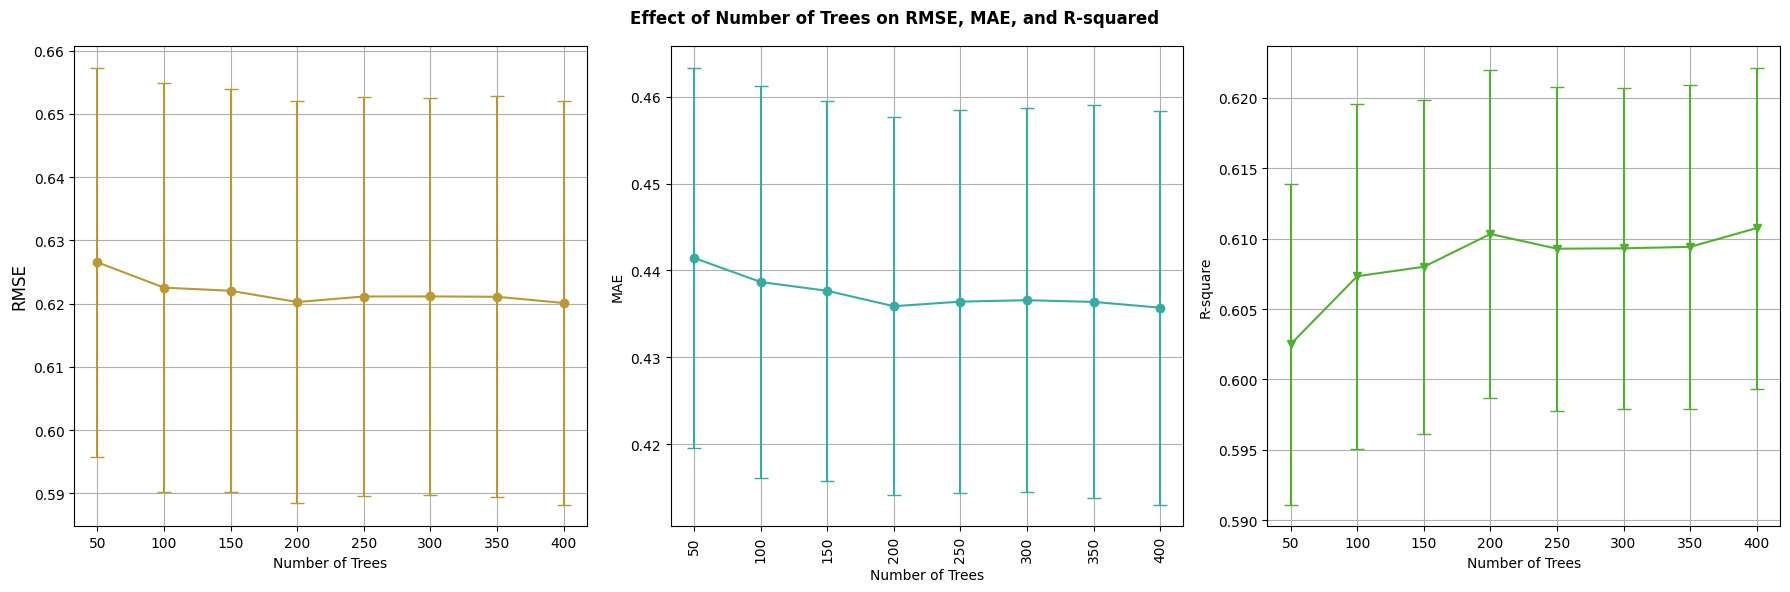

In [ ]:
# Visualize
fig, ax = plt.subplots(1,3,figsize=(18, 6))

# Use a vibrant color palette, for example, "viridis"
ax[0].errorbar(no_trees, mean_RMSE, yerr= range_95CI_RMSE,
             fmt='o-', label='RMSE', color = palette[1], capsize = 5)


# Customize labels and title
ax[0].set_xlabel('Number of Trees')
ax[0].set_ylabel('RMSE', fontsize=12)
ax[0].grid(True)
ax[0].set_xticks(no_trees)


# Use a vibrant color palette, for example, "viridis"
ax[2].errorbar(no_trees, mean_R2, yerr= range_95CI_R2,
             fmt='v-', label='R2',color = palette[2], capsize = 5)

# Customize labels and title
ax[2].set_xlabel('Number of Trees')
ax[2].set_ylabel('R-square')
ax[2].grid(True)
ax[2].set_xticks(no_trees)


#Create ax for MAE
ax[1].errorbar(no_trees, mean_MAE, yerr= range_95CI_MAE,
             fmt='o-', label='MAE',color = palette[3], capsize = 5)

# Customize labels and title
ax[1].set_xlabel('Number of Trees')
ax[1].set_ylabel('MAE')
ax[1].grid(True)
ax[1].set_xticks(no_trees)
ax[1].set_xticklabels(no_trees, rotation=90)


fig.suptitle('Effect of Number of Trees on RMSE, MAE, and R-squared', weight = "bold")
plt.tight_layout()
plt.show()

In [ ]:
# Set up parameter grid
param_grid = {
    'n_estimators': range(150, 200),
    'max_depth': range(5, 20),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Run cross validation
grid_search_model = GridSearchCV(RandomForestRegressor(random_state = 42), param_grid=param_grid, cv=10, scoring={
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mse': make_scorer(mean_squared_error)
    }, refit = 'mse')
grid_search_model.fit(X_train, Y_train)

In [ ]:
# Get the best hyperparameters from the grid search
best_params = grid_search_model.best_params_
print("Best Hyperparameters:", best_params)

# **5. COMPARISON OF MODELS**

In the following consoles, we used the models given the best parameters to draw the prediction on testing set, to see how the model perform and then went to the conclusion.

In [9]:
# Use the mutiple linear regression for all features to draw prediction
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)
mlr_prediction = mlr_model.predict(x_test)

mlr_RMSE = np.sqrt(mean_squared_error(y_test, mlr_prediction))
mlr_MAE = mean_absolute_error(y_test, mlr_prediction)
mlr_R2 = r2_score(y_test, mlr_prediction)

# Use the optimal KNN model to draw prediction
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, Y_train)
knn_prediction = knn_model.predict(x_test)

knn_RMSE = np.sqrt(mean_squared_error(y_test, knn_prediction))
knn_MAE = mean_absolute_error(y_test, knn_prediction)
knn_R2 = r2_score(y_test, knn_prediction)

# Use the optimal RF model to draw prediction
rf_model = RandomForestRegressor(n_estimators= 184,
                                 bootstrap=False,
                                 max_depth=13,
                                 max_features='log2',
                                 min_samples_leaf=5,
                                 min_samples_split=4)
rf_model.fit(X_train, Y_train)
rf_prediction = rf_model.predict(x_test)

rf_RMSE = np.sqrt(mean_squared_error(y_test, rf_prediction))
rf_MAE = mean_absolute_error(y_test, rf_prediction)
rf_R2 = r2_score(y_test, rf_prediction)


In [83]:
rf_model = RandomForestRegressor(n_estimators= 184,
                                 bootstrap=False,
                                 max_depth=13,
                                 max_features='log2',
                                 min_samples_leaf=5,
                                 min_samples_split=4)
rf_model.fit(X_train, Y_train)
rf_prediction_test_ds = rf_model.predict(x_test)
rf_prediction_train_ds = rf_model.predict(X_train)

rf_RMSE = np.sqrt(mean_squared_error(y_test, rf_prediction_test_ds))
rf_MAE = mean_absolute_error(y_test, rf_prediction_test_ds)
rf_R2 = r2_score(y_test, rf_prediction_test_ds)

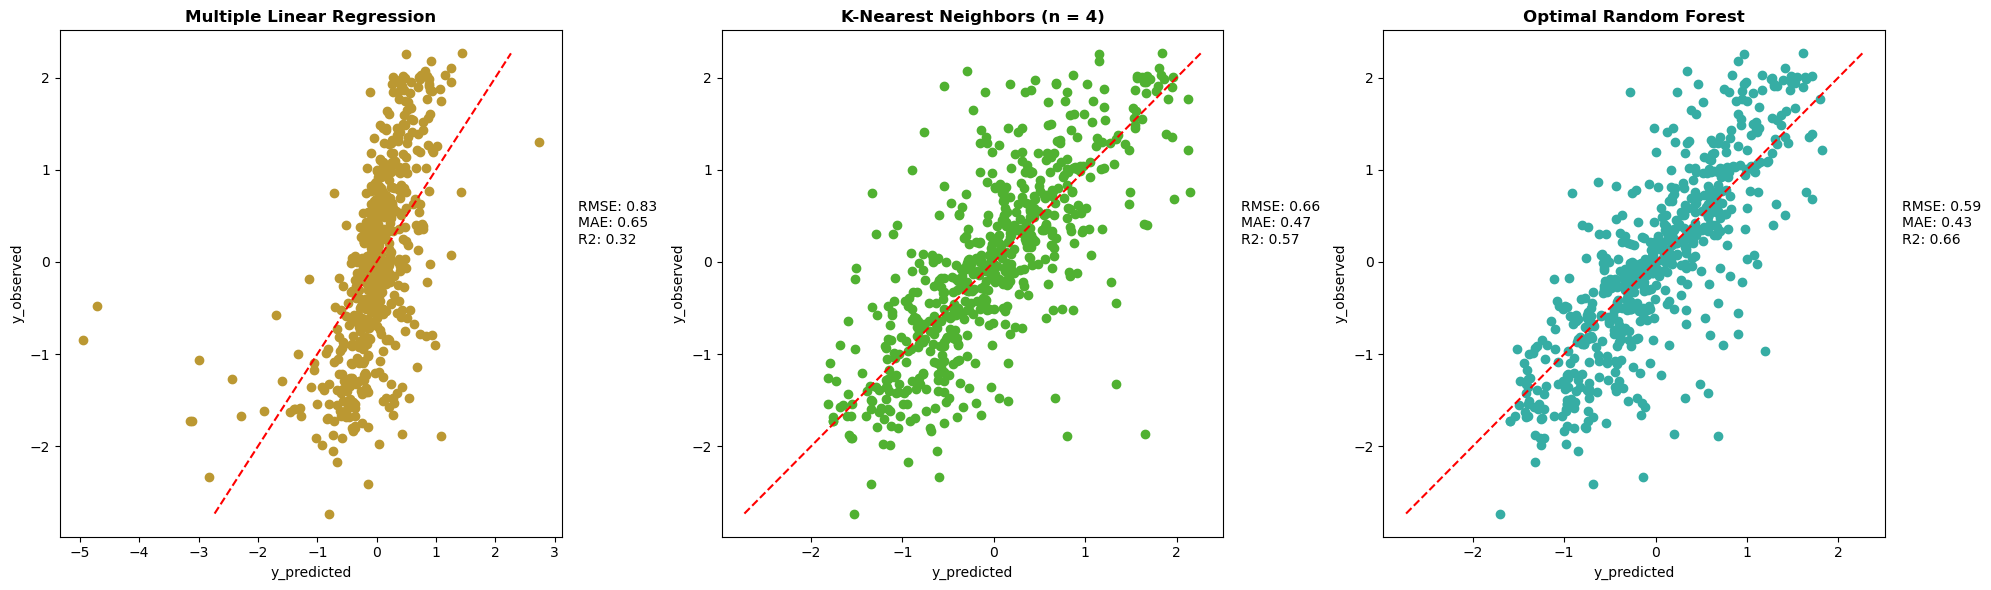

In [10]:
# Plot the MLR
fig, ax = plt.subplots(1,3, figsize = (20,6) )
ax[0].scatter(mlr_prediction, y_test, color = palette[1])
ax[0].set_xlabel('y_predicted')
ax[0].set_ylabel('y_observed')
ax[0].set_title('Multiple Linear Regression', weight = "bold")
ax[0].text(3.4, 0.2, f'RMSE: {mlr_RMSE:.2f}\nMAE: {mlr_MAE:.2f}\nR2: {mlr_R2:.2f}')
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Plot the optimal KNN
ax[1].scatter(knn_prediction, y_test, color = palette[2])
ax[1].set_xlabel('y_predicted')
ax[1].set_ylabel('y_observed')
ax[1].set_title('K-Nearest Neighbors (n = 4)', weight = "bold")
ax[1].text(2.7, 0.2, f'RMSE: {knn_RMSE:.2f}\nMAE: {knn_MAE:.2f}\nR2: {knn_R2:.2f}')
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Plot the optimal RF
ax[2].scatter(rf_prediction, y_test, color = palette[3])
ax[2].set_xlabel('y_predicted')
ax[2].set_ylabel('y_observed')
ax[2].set_title('Optimal Random Forest', weight = "bold")
ax[2].text(2.7, 0.2, f'RMSE: {rf_RMSE:.2f}\nMAE: {rf_MAE:.2f}\nR2: {rf_R2:.2f}')
ax[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [11]:
# Feature impotance evaluation
feature_importances = rf_model.feature_importances_
indices = feature_importances.argsort()[::-1]

In [ ]:
print("Feature importances:")
for f, importance in zip(range(X.shape[1]), feature_importances[indices]):
    print(f"{X.columns[indices[f]]}: {importance}")

Feature importances:
MolLogP: 0.29386835277179246
MolMR: 0.12469030682859221
MolWt: 0.0880875445002617
LabuteASA: 0.0862391203358907
NumValenceElectrons: 0.06494045384597669
BalabanJ: 0.059169649361317155
TPSA: 0.050898435691068694
BertzCT: 0.04732311522871149
HeavyAtomCount: 0.041918673613903334
NumRotatableBonds: 0.038018931348539085
NumHeteroatoms: 0.03219418713570881
NumHDonors: 0.027347317832793656
NumHAcceptors: 0.02325752723313343
RingCount: 0.010204201854567205
NumAromaticRings: 0.007451789844153353
NumAliphaticRings: 0.0029887982262664825
NumSaturatedRings: 0.0014015943473234375


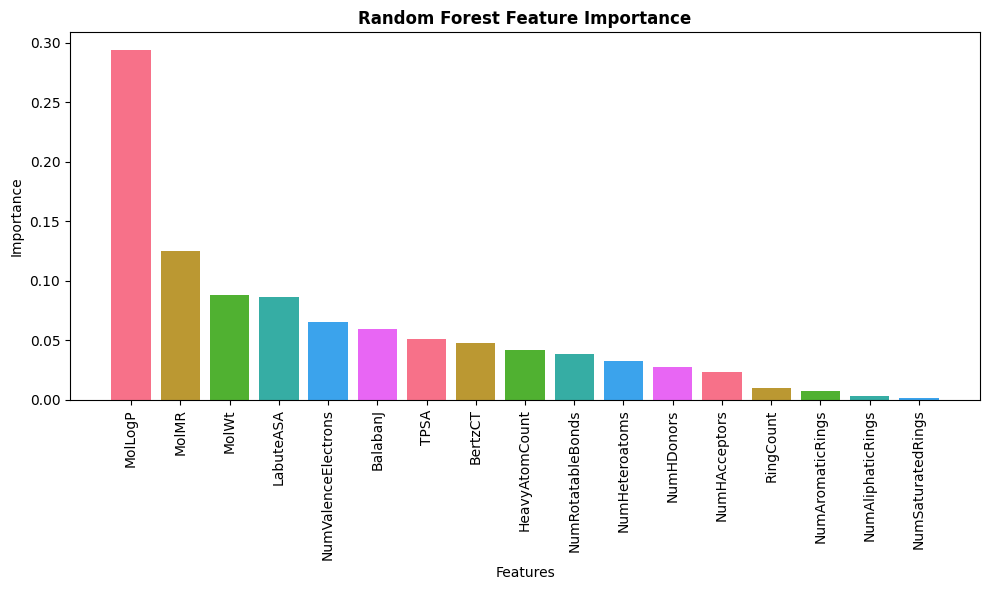

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance", weight = 'bold')
plt.bar(range(X.shape[1]), feature_importances[indices], align="center",
        color = [palette[0], palette[1], palette[2],palette[3],palette[4], palette[5]])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# **6. CONFORMAL PREDICTION FOR FINAL MODELS**

The conformal analysis was built to study the uncertainty of the final RF models

In [180]:
# Fit model to training set
rf_model = RandomForestRegressor(n_estimators= 184,
                                 bootstrap=False,
                                 max_depth=13,
                                 max_features='log2',
                                 min_samples_leaf=5,
                                 min_samples_split=4,
                                 random_state=42)
rf_model.fit(x_train, y_train)

# Generate training abs error
y_train_prediction = rf_model.predict(x_train)
y_train_error = abs(y_train_prediction-y_train)

# Build the error model
error_model = RandomForestRegressor(n_estimators= 184,
                                 bootstrap=False,
                                 max_depth=13,
                                 max_features='log2',
                                 min_samples_leaf=5,
                                 min_samples_split=4,
                                 random_state = 42)
error_model.fit(x_train, y_train_error)

# Generate calibrating error
y_cal_prediction = rf_model.predict(x_calibrate)
y_cal_error_prediction = error_model.predict(x_calibrate)
y_cal_error = abs(y_cal_prediction-y_calibrate)
alpha = y_cal_error/y_cal_error_prediction

# Choose quantile
quantile_list = [0.6, 0.7, 0.8, 0.9]
y_test_prediction = rf_model.predict(x_test)
y_test_error_prediction = error_model.predict(x_test)

# Build the interval
interval_summary = pd.DataFrame()
for quantile in quantile_list: 
   # Determine non-conformity score for test sets:
   alpha_test = np.quantile(alpha, quantile)
   
   # Calculate prediction interval base on non-conformity score
   interval = y_test_error_prediction*alpha_test


   # Append interval in a summary table
   interval_summary[f'lower_{quantile}'] = y_test_prediction - interval
   interval_summary[f'upper_{quantile}'] = y_test_prediction + interval



In [181]:
# Summary table
summary = interval_summary
summary['y_test'] = list(y_test)
summary['y_pred'] = y_test_prediction

In [182]:
# Filter the accurate and inaccurate prediction for each quantile
def generate_predictions(summary, threshold):
    lower_col = f'lower_{threshold}'
    upper_col = f'upper_{threshold}'
    
    # Accurate predictions
    accurate_pred = summary.loc[(summary['y_test'] <= summary[upper_col]) & (summary['y_test'] >= summary[lower_col]),
                                [lower_col, upper_col, 'y_test', 'y_pred']]
    
    # Inaccurate predictions
    inaccurate_pred = summary.loc[(summary['y_test'] >= summary[upper_col]) | (summary['y_test'] <= summary[lower_col]),
                                  [lower_col, upper_col, 'y_test', 'y_pred']]
    
    return accurate_pred, inaccurate_pred

# Example usage:
accurate_pred_06, inaccurate_pred_06 = generate_predictions(summary, '0.6')
accurate_pred_07, inaccurate_pred_07 = generate_predictions(summary, '0.7')
accurate_pred_08, inaccurate_pred_08 = generate_predictions(summary, '0.8')
accurate_pred_09, inaccurate_pred_09 = generate_predictions(summary, '0.9')


In [183]:
# Evaluation
accurate_rate_06 = accurate_pred_06.shape[0]/summary.shape[0]
accurate_rate_07 = accurate_pred_07.shape[0]/summary.shape[0]
accurate_rate_08 = accurate_pred_08.shape[0]/summary.shape[0]
accurate_rate_09 = accurate_pred_09.shape[0]/summary.shape[0]

print(f'''Prediction Capacity: 
0.6 quantile: {accurate_rate_06:.2f}
0.7 quantile: {accurate_rate_07:.2f}
0.8 quantile: {accurate_rate_08:.2f}
0.9 quantile: {accurate_rate_09:.2f}''')

Prediction Capacity: 
0.6 quantile: 0.61
0.7 quantile: 0.70
0.8 quantile: 0.80
0.9 quantile: 0.91


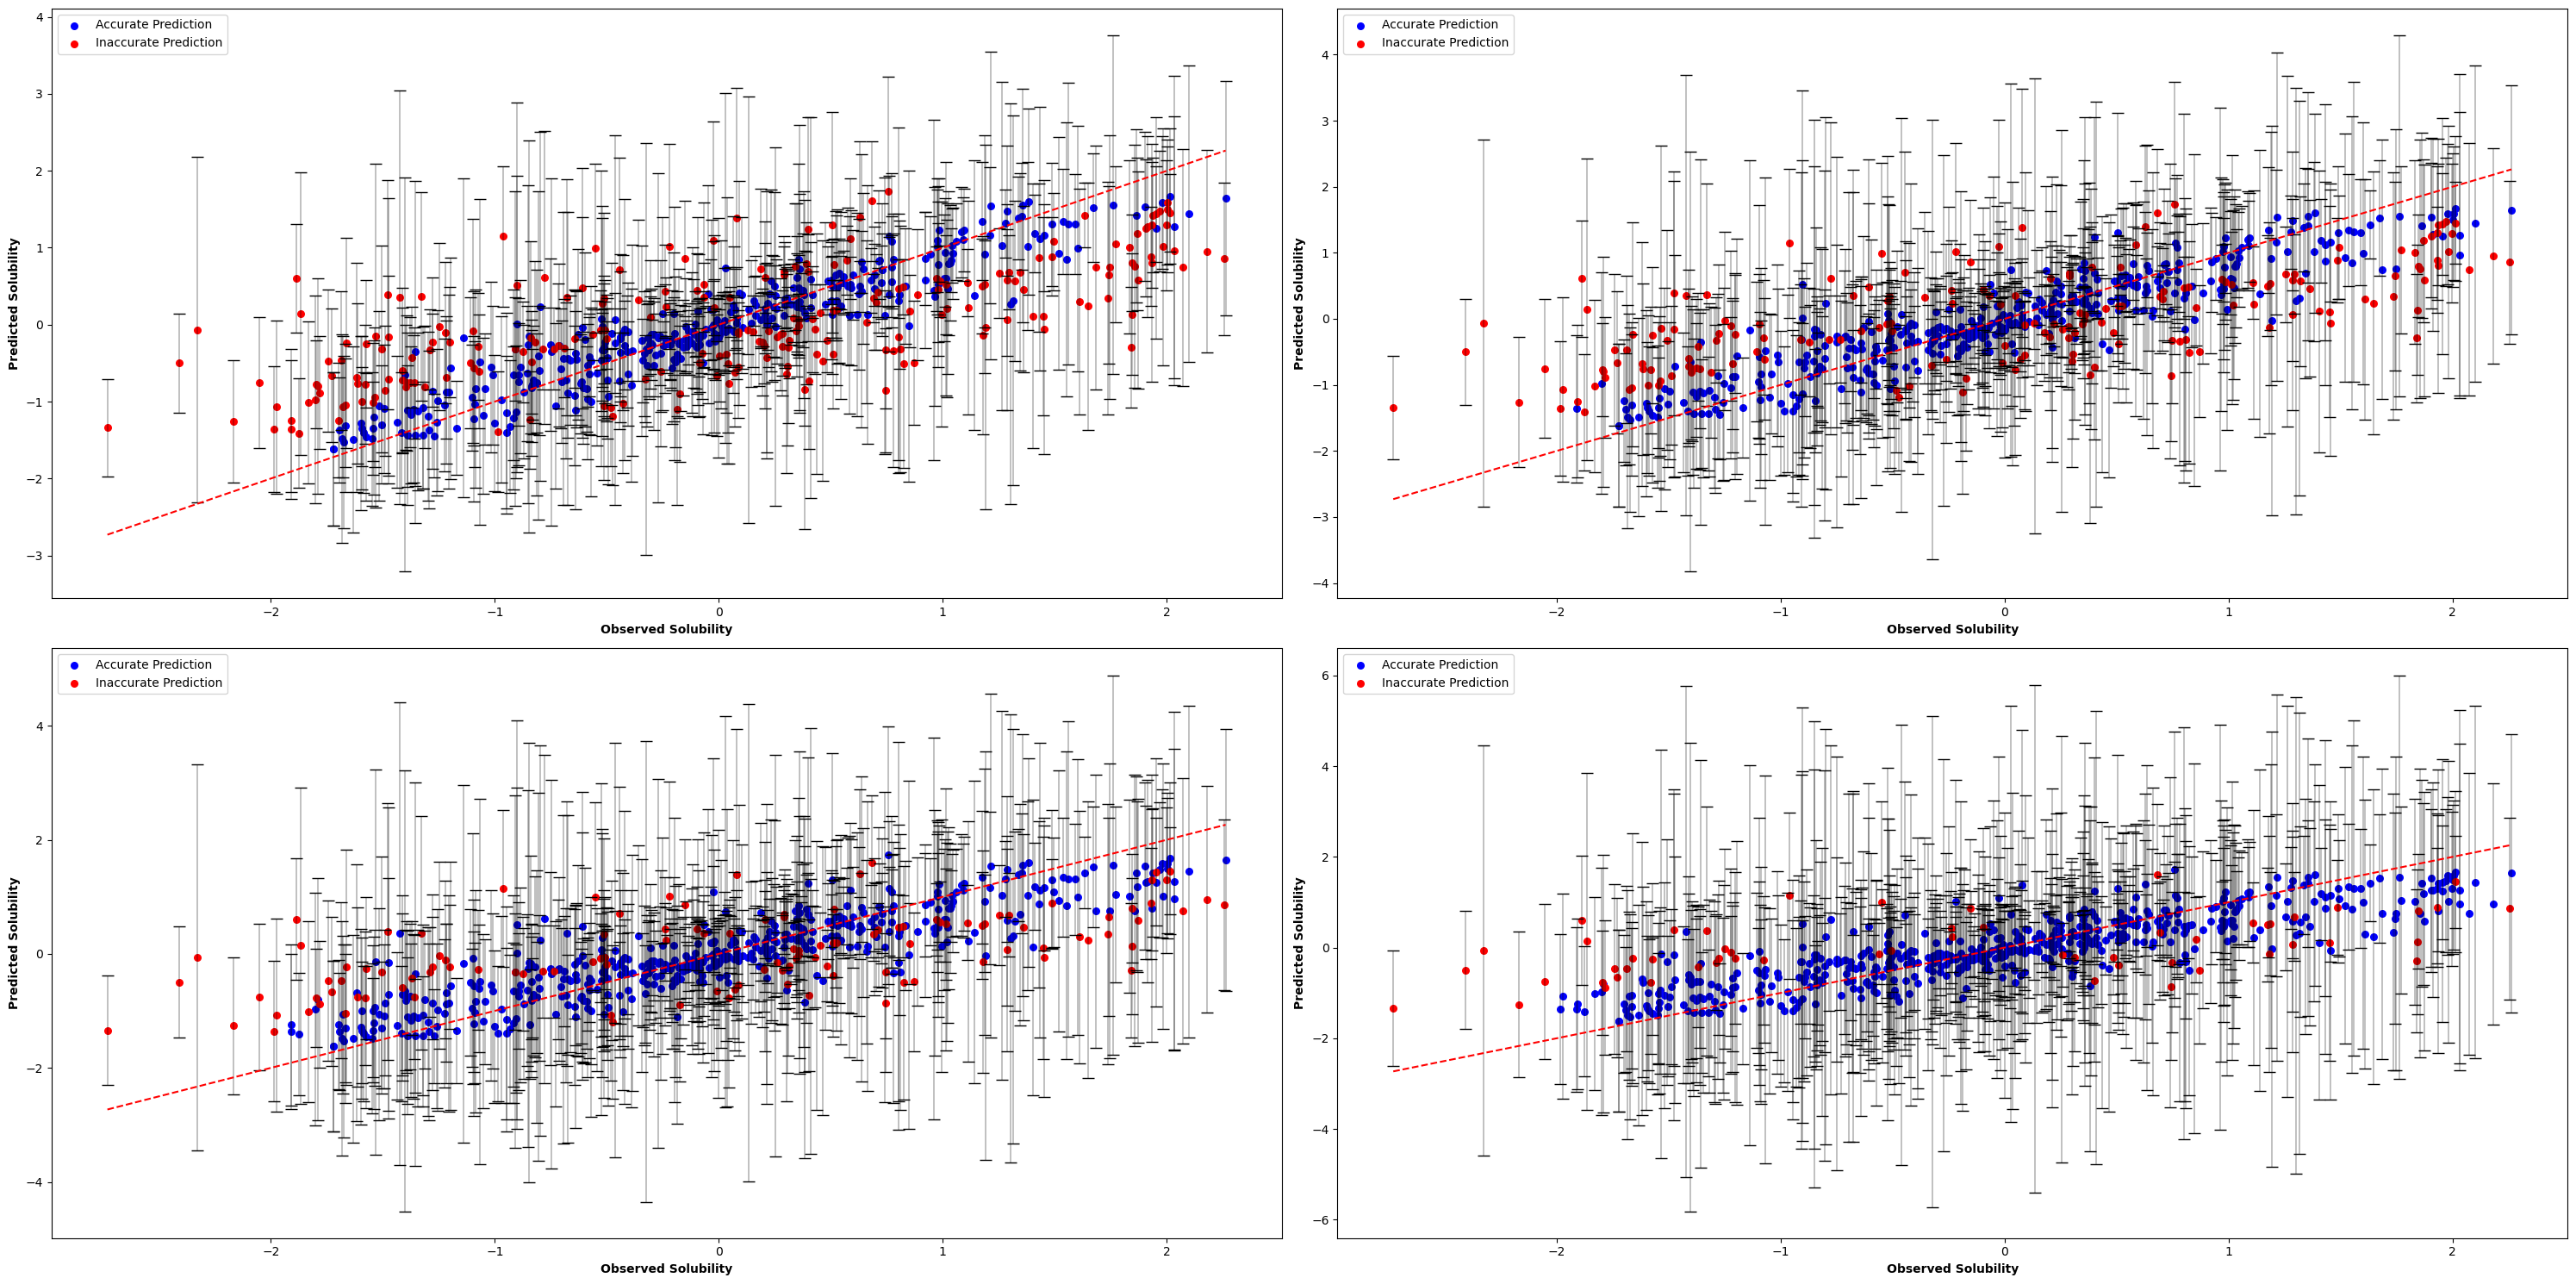

In [184]:
def plot_results(ax, accurate_data, inaccurate_data, y_test, y_test_prediction, summary, threshold):
    # Scatter plot for accurate predictions
    ax.scatter(accurate_data['y_test'], accurate_data['y_pred'], color='blue', label='Accurate Prediction', s=30)
    
    # Scatter plot for inaccurate predictions
    ax.scatter(inaccurate_data['y_test'], inaccurate_data['y_pred'], color='red', label='Inaccurate Prediction', s=30)
    
    # Error bar plot
    ax.errorbar(y_test, y_test_prediction, yerr=summary[f'upper_{threshold}'] - summary[f'lower_{threshold}'], 
                fmt='o', color='black', capsize=5, markersize=0, linewidth=0.35)
    
    # Diagonal line plot
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    
    # Set axis labels
    ax.set_xlabel('Observed Solubility', weight='bold')
    ax.set_ylabel('Predicted Solubility', weight='bold')
    
    # Set legend
    ax.legend()

# Plot the result
fig, ax = plt.subplots(2, 2, figsize=(30,15))

plot_results(ax[0, 0], accurate_pred_06, inaccurate_pred_06, y_test, y_test_prediction, summary, '0.6')
plot_results(ax[0, 1], accurate_pred_07, inaccurate_pred_07, y_test, y_test_prediction, summary, '0.7')
plot_results(ax[1, 0], accurate_pred_08, inaccurate_pred_08, y_test, y_test_prediction, summary, '0.8')
plot_results(ax[1, 1], accurate_pred_09, inaccurate_pred_09, y_test, y_test_prediction, summary, '0.9')

plt.tight_layout()
plt.show()


# **7. FILTERING DATASET**
In this part, I reduced 122 inorganic compounds out of the dataset, aiming to reduce the outlier in solubility

In [10]:
df_raw = df_1

# Filter out compounds without carbon atom in structure
df_filter = df_raw[df_raw['SMILES'].str.lower().str.contains('c')]

# Drop unneccessay columns
df_drop = df_filter.drop(['ID','Name','InChI','InChIKey','SMILES','SD','Ocurrences','Group'],axis=1)

# Standardize data using the previous scaler
df_standard = scaler.transform(df_drop)
df_standard = pd.DataFrame(df_standard, columns = df_drop.columns)
df_standard

,Solubility,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,-0.050942,0.299232,0.266845,0.333121,0.148984,-0.799738,-0.601501,-0.503979,1.144191,0.315304,-0.596995,-0.336433,-0.434172,-0.727944,-0.806740,0.255201,-1.478684,-0.380519
1,0.109473,-0.514806,-0.041725,-0.373255,-0.398650,-0.582536,0.070567,-0.503979,-0.662035,-0.498659,0.552731,-0.336433,0.586209,0.763744,-0.444656,-0.481952,0.390220,-0.007614
2,0.587880,-0.619105,-0.092008,-0.583748,-0.617704,-0.582536,-0.601501,-0.503979,-0.555786,-0.661452,-0.022132,-0.336433,-0.434172,-0.230714,-0.594342,-0.631638,0.699017,-0.390084
3,-0.187795,1.624995,1.093225,1.706418,1.791885,0.503475,0.742636,0.280424,0.400451,1.556598,2.852182,-0.336433,-0.434172,2.255432,0.695350,1.716776,-1.478684,1.793895
4,-0.515254,0.408638,-0.025845,0.565541,0.587091,0.503475,-0.601501,0.123544,0.612948,0.539144,0.552731,4.713212,3.647355,2.255432,-0.102480,0.473353,-0.694056,0.313007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,0.689726,1.162628,-1.474732,0.693828,0.915671,1.589485,1.414705,1.849231,0.081705,0.742635,-0.022132,-0.336433,1.606591,0.763744,1.644359,1.195914,-1.478681,1.274161
1884,0.734348,0.678368,0.331978,0.704976,0.806144,0.937879,-0.601501,0.751066,0.081705,0.620540,1.702456,-0.336433,-0.434172,1.260973,0.635003,0.846524,-1.478681,1.244543
1885,1.012910,-0.708398,-0.577083,-0.757433,-0.672467,-0.365334,0.742636,-0.190218,-0.449538,-0.681801,-0.596995,-0.336433,-0.434172,-0.727944,0.121490,-0.748443,1.175718,-0.493814
1886,0.886752,-0.317488,-0.209163,-0.165686,-0.234360,-0.148132,0.742636,-0.347098,-0.130792,-0.213772,-0.022132,-0.336433,-0.434172,-0.230714,-0.262992,-0.286019,0.533565,-0.274126


# **8. PCP MODEL**

In [22]:
# Spliting data into training set and testing set 
X = df_standard.drop('Solubility', axis = 1)
Y = df_standard['Solubility']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 43)

In [172]:
# Cross-validation with the training set 
no_trees = [50,100,150,200,250,300,350,400]

# Use GridSearchCV
param = {'n_estimators': no_trees}

# Create GridSearch 
grid_search_model = GridSearchCV(RandomForestRegressor(random_state=123), param_grid=param, cv=10, scoring={
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mse': make_scorer(mean_squared_error)
    }, refit = False)
grid_search_model.fit(X_train, Y_train)

# Extract R2 from grid_search_model
mean_R2 = grid_search_model.cv_results_['mean_test_r2']

std_R2 = grid_search_model.cv_results_['std_test_r2']

range_95CI_R2 =  1.96*std_R2/np.sqrt(101)

# Extract MAE from grid_search_model
mean_MAE = grid_search_model.cv_results_['mean_test_mae']

std_MAE = grid_search_model.cv_results_['std_test_mae']

range_95CI_MAE =  1.96*std_MAE/np.sqrt(10)

# Extract RMSE from grid_search_model
mean_MSE = grid_search_model.cv_results_['mean_test_mse']
mean_RMSE = np.sqrt(mean_MSE)

std_MSE = grid_search_model.cv_results_['std_test_mse']
std_RMSE = std_MSE / (2 * np.sqrt(mean_MSE))

range_95CI_RMSE =  1.96*std_RMSE/np.sqrt(10)



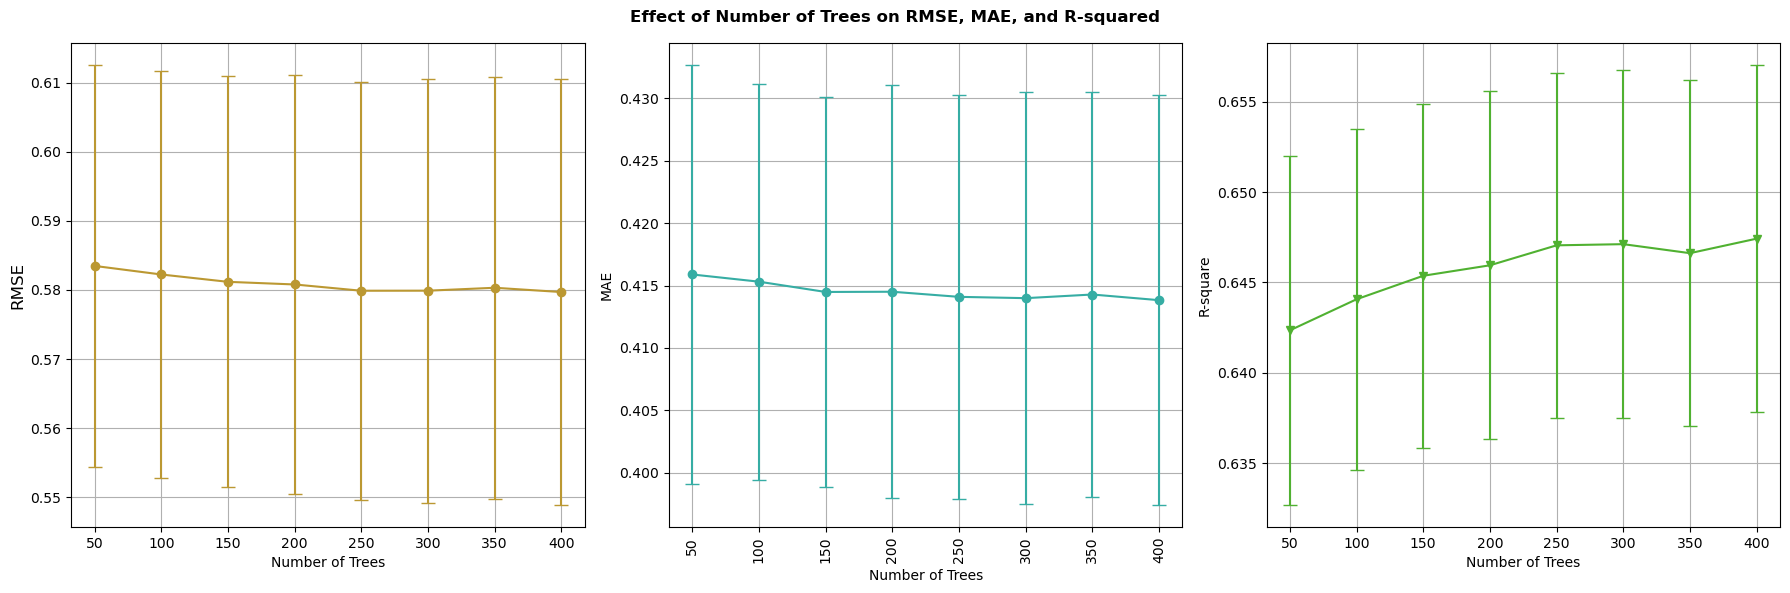

In [159]:
# Visualize the cross_validation results
fig, ax = plt.subplots(1,3,figsize=(18, 6))

# Plot errror bar for RMSE
ax[0].errorbar(no_trees, mean_RMSE, yerr= range_95CI_RMSE,
             fmt='o-', label='RMSE', color = palette[1], capsize = 5)
# Customize labels and title
ax[0].set_xlabel('Number of Trees')
ax[0].set_ylabel('RMSE', fontsize=12)
ax[0].grid(True)
ax[0].set_xticks(no_trees)


# # Plot errror bar for R2
ax[2].errorbar(no_trees, mean_R2, yerr= range_95CI_R2,
             fmt='v-', label='R2',color = palette[2], capsize = 5)

# Customize labels and title
ax[2].set_xlabel('Number of Trees')
ax[2].set_ylabel('R-square')
ax[2].grid(True)
ax[2].set_xticks(no_trees)


## Plot errror bar for MAE
ax[1].errorbar(no_trees, mean_MAE, yerr= range_95CI_MAE,
             fmt='o-', label='MAE',color = palette[3], capsize = 5)

# Customize labels and title
ax[1].set_xlabel('Number of Trees')
ax[1].set_ylabel('MAE')
ax[1].grid(True)
ax[1].set_xticks(no_trees)
ax[1].set_xticklabels(no_trees, rotation=90)


fig.suptitle('Effect of Number of Trees on RMSE, MAE, and R-squared', weight = "bold")
plt.tight_layout()
plt.show()

# **9. MF MODEL**
This part included 2 main tasks: convert compounds into MACCS+Morgan fingerprint and build the RF model using finger-print as descriptos

In [28]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem


# Translation to MACC fingerprint
MACC_fingerprint = []

def inchi_to_maccs(inchi):
    mol = Chem.MolFromInchi(inchi)
    
    # Check if the molecule is valid
    if mol is not None:
        # Generate MACCS fingerprint
        maccs_fp = MACCSkeys.GenMACCSKeys(mol)
        
        # Convert to a numerical array
        return list(map(int, maccs_fp.ToBitString()))
    else:
        return None


for InChI in df_filter['InChI']:
    inchi_representation = InChI
    maccs_fingerprint = inchi_to_maccs(inchi_representation)
    MACC_fingerprint.append(maccs_fingerprint)


# Translation to Morgan fingerprint:
def inchi_to_morgan(inchi, radius=2, nBits=2048):
    mol = Chem.MolFromInchi(inchi)
    
    # Check if the molecule is valid
    if mol is not None:
        # Generate Morgan fingerprint
        morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        
      
        # AllChem.DataStructs.ConvertToNumpyArray(morgan_fp, morgan_array)
        
        return np.array(list(map(int, morgan_fp.ToBitString())))
    else:
        return None


morgan_fingerprint = []
for inchi in df_filter['InChI']:
    inchi_representation = inchi

    # Convert InChI to Morgan fingerprint
    fingerprint = inchi_to_morgan(inchi_representation)
    morgan_fingerprint.append(fingerprint)






[18:35:47] WARNING: not removing hydrogen atom without neighbors
[18:35:47] WARNING: not removing hydrogen atom without neighbors
[18:35:48] WARNING: not removing hydrogen atom without neighbors
[18:35:48] WARNING: not removing hydrogen atom without neighbors


In [29]:
# Turn list into DataFrame for later merging
MACC_fingerprint_df = pd.DataFrame(MACC_fingerprint)
morgan_fingerprint_df = pd.DataFrame(morgan_fingerprint)

In [30]:
# Spliting data for building model
X_fp = morgan_fingerprint_df.merge(MACC_fingerprint_df,left_index=True,right_index=True, suffixes=['_morgan','_macc'])
X_fp.columns = X_fp.columns.astype(str)

Y = df_standard['Solubility']

X_train_fp, x_test_fp, Y_train_fp, y_test_fp = train_test_split(X_fp, Y, test_size = 0.2, random_state = 43)

In [31]:
# Cross-validation with the training set 
no_trees = [50,100,150,200,250,300,350,400]

# Use GridSearchCV
param = {'n_estimators': no_trees}

# Create GridSearch for RMSE
grid_search_model = GridSearchCV(RandomForestRegressor(random_state=123), param_grid=param, cv=10, scoring={
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mse': make_scorer(mean_squared_error)
    }, refit = False)
grid_search_model.fit(X_train_fp, Y_train_fp)

# Extract R2 from grid_search_model
mean_R2 = grid_search_model.cv_results_['mean_test_r2']

std_R2 = grid_search_model.cv_results_['std_test_r2']

range_95CI_R2 =  1.96*std_R2/np.sqrt(101)

# Extract MAE from grid_search_model
mean_MAE = grid_search_model.cv_results_['mean_test_mae']

std_MAE = grid_search_model.cv_results_['std_test_mae']

range_95CI_MAE =  1.96*std_MAE/np.sqrt(10)

# Extract RMSE from grid_search_model
mean_MSE = grid_search_model.cv_results_['mean_test_mse']
mean_RMSE = np.sqrt(mean_MSE)

std_MSE = grid_search_model.cv_results_['std_test_mse']
std_RMSE = std_MSE / (2 * np.sqrt(mean_MSE))

range_95CI_RMSE =  1.96*std_RMSE/np.sqrt(10)



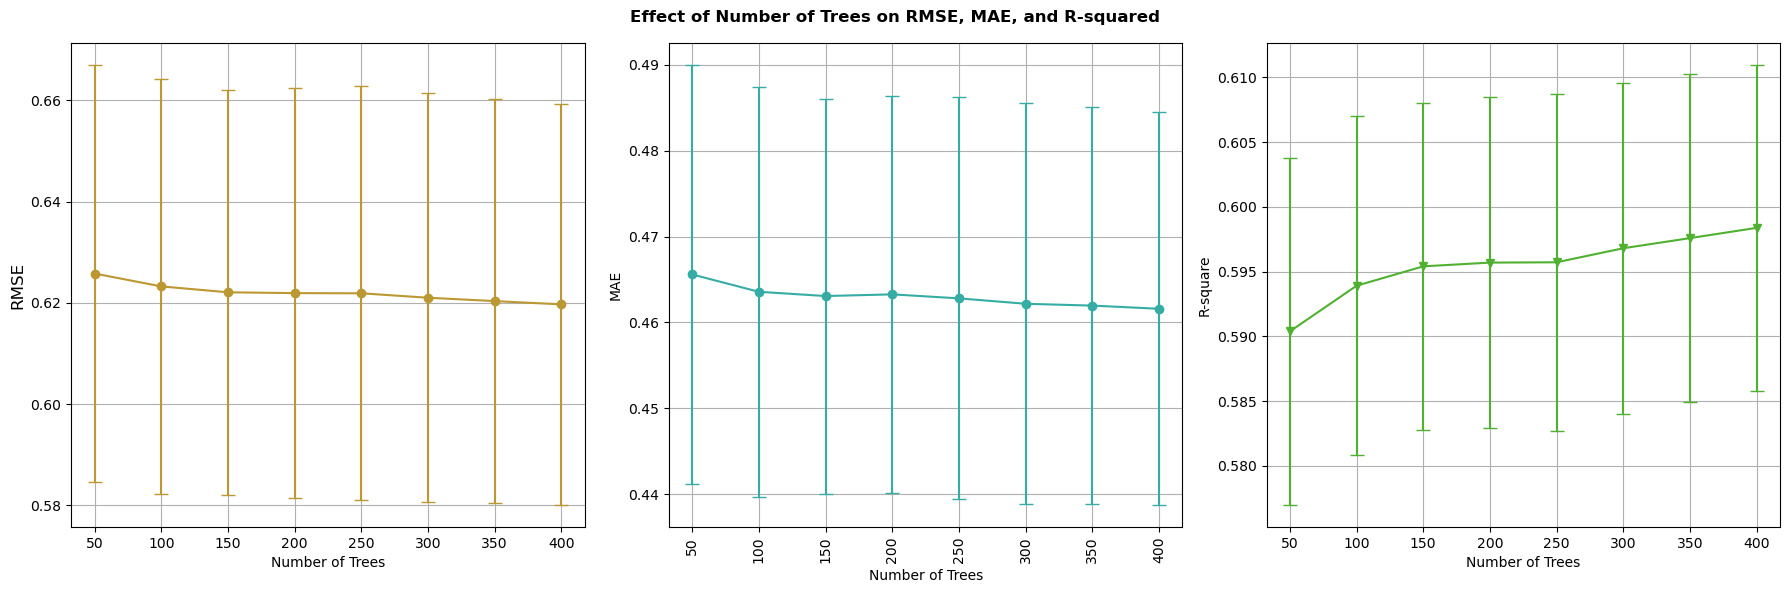

In [32]:
# Visualize
fig, ax = plt.subplots(1,3,figsize=(18, 6))

# Use a vibrant color palette, for example, "viridis"
ax[0].errorbar(no_trees, mean_RMSE, yerr= range_95CI_RMSE,
             fmt='o-', label='RMSE', color = palette[1], capsize = 5)


# Customize labels and title
ax[0].set_xlabel('Number of Trees')
ax[0].set_ylabel('RMSE', fontsize=12)
ax[0].grid(True)
ax[0].set_xticks(no_trees)


# Use a vibrant color palette, for example, "viridis"
ax[2].errorbar(no_trees, mean_R2, yerr= range_95CI_R2,
             fmt='v-', label='R2',color = palette[2], capsize = 5)

# Customize labels and title
ax[2].set_xlabel('Number of Trees')
ax[2].set_ylabel('R-square')
ax[2].grid(True)
ax[2].set_xticks(no_trees)


#Create ax for MAE
ax[1].errorbar(no_trees, mean_MAE, yerr= range_95CI_MAE,
             fmt='o-', label='MAE',color = palette[3], capsize = 5)

# Customize labels and title
ax[1].set_xlabel('Number of Trees')
ax[1].set_ylabel('MAE')
ax[1].grid(True)
ax[1].set_xticks(no_trees)
ax[1].set_xticklabels(no_trees, rotation=90)


fig.suptitle('Effect of Number of Trees on RMSE, MAE, and R-squared', weight = "bold")
plt.tight_layout()
plt.show()

# **10. MFPCP MODEL**
This part combined the both physiochemical properties and molecular fingerprint, then use all of them as descriptors.

In [33]:
# Combine data sets
X_combine = X_fp
X_combine = pd.concat([X_fp, X], axis = 1)

Y = df_standard['Solubility']

X_train_combine, x_test_combine, Y_train_combine, y_test_combine = train_test_split(X_combine, Y, test_size = 0.2, random_state = 43)

In [34]:
# Cross-validation with the training set 
no_trees = [50,100,150,200,250,300,350,400]

# Use GridSearchCV
param = {'n_estimators': no_trees}

# Create GridSearch for RMSE
grid_search_model = GridSearchCV(RandomForestRegressor(random_state=123), param_grid=param, cv=10, scoring={
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mse': make_scorer(mean_squared_error)
    }, refit = False)
grid_search_model.fit(X_train_combine, Y_train_combine)

# Extract R2 from grid_search_model
mean_R2 = grid_search_model.cv_results_['mean_test_r2']

std_R2 = grid_search_model.cv_results_['std_test_r2']

range_95CI_R2 =  1.96*std_R2/np.sqrt(101)

# Extract MAE from grid_search_model
mean_MAE = grid_search_model.cv_results_['mean_test_mae']

std_MAE = grid_search_model.cv_results_['std_test_mae']

range_95CI_MAE =  1.96*std_MAE/np.sqrt(10)

# Extract RMSE from grid_search_model
mean_MSE = grid_search_model.cv_results_['mean_test_mse']
mean_RMSE = np.sqrt(mean_MSE)

std_MSE = grid_search_model.cv_results_['std_test_mse']
std_RMSE = std_MSE / (2 * np.sqrt(mean_MSE))

range_95CI_RMSE =  1.96*std_RMSE/np.sqrt(10)



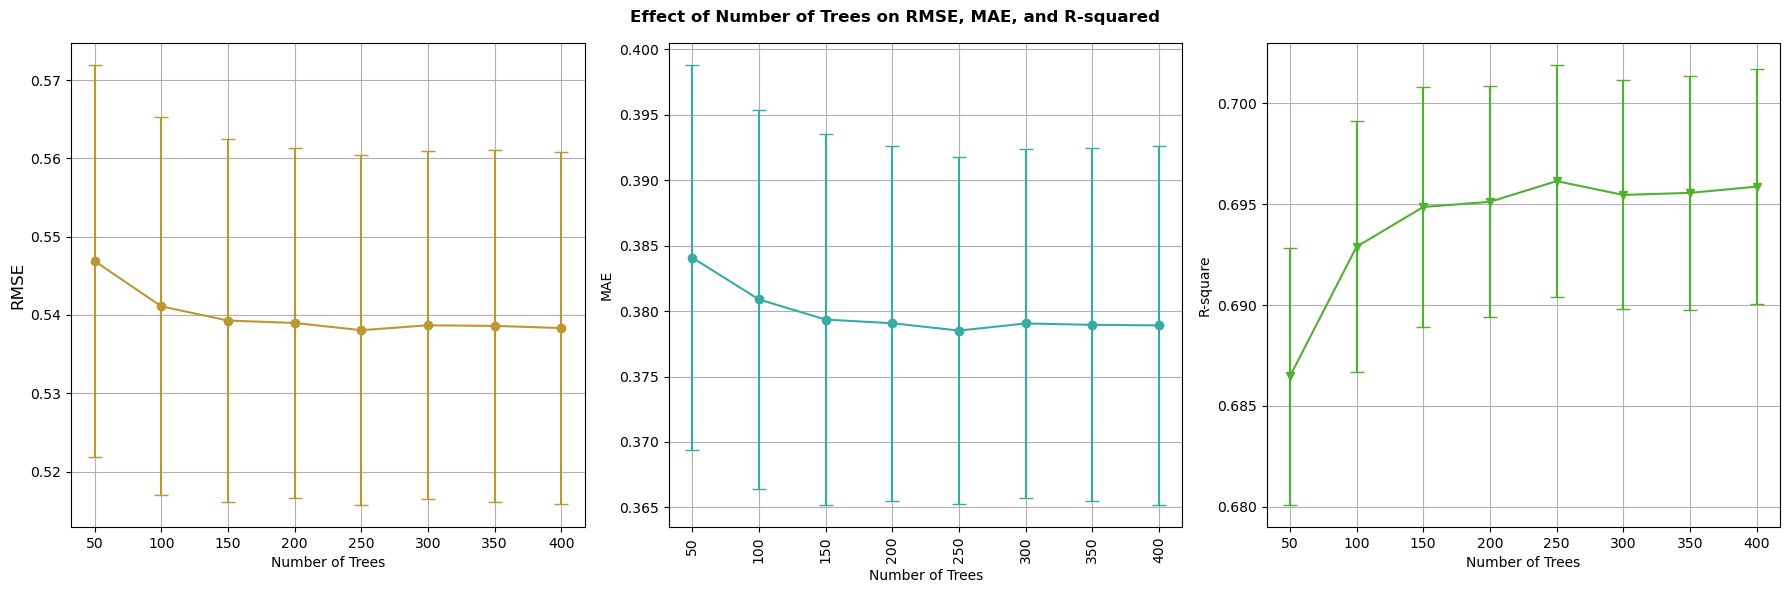

In [35]:
# Visualize
fig, ax = plt.subplots(1,3,figsize=(18, 6))

# Use a vibrant color palette, for example, "viridis"
ax[0].errorbar(no_trees, mean_RMSE, yerr= range_95CI_RMSE,
             fmt='o-', label='RMSE', color = palette[1], capsize = 5)


# Customize labels and title
ax[0].set_xlabel('Number of Trees')
ax[0].set_ylabel('RMSE', fontsize=12)
ax[0].grid(True)
ax[0].set_xticks(no_trees)


# Use a vibrant color palette, for example, "viridis"
ax[2].errorbar(no_trees, mean_R2, yerr= range_95CI_R2,
             fmt='v-', label='R2',color = palette[2], capsize = 5)

# Customize labels and title
ax[2].set_xlabel('Number of Trees')
ax[2].set_ylabel('R-square')
ax[2].grid(True)
ax[2].set_xticks(no_trees)


#Create ax for MAE
ax[1].errorbar(no_trees, mean_MAE, yerr= range_95CI_MAE,
             fmt='o-', label='MAE',color = palette[3], capsize = 5)

# Customize labels and title
ax[1].set_xlabel('Number of Trees')
ax[1].set_ylabel('MAE')
ax[1].grid(True)
ax[1].set_xticks(no_trees)
ax[1].set_xticklabels(no_trees, rotation=90)


fig.suptitle('Effect of Number of Trees on RMSE, MAE, and R-squared', weight = "bold")
plt.tight_layout()
plt.show()

# **11. COMPARISON BETWEEN PCP, MF, and MFPCP**

In [57]:
# Define models
rf_model_pcp = RandomForestRegressor(n_estimators=300,random_state=123)
rf_model_mf = RandomForestRegressor(n_estimators=400,random_state=123)
rf_model_combine = RandomForestRegressor(n_estimators=250,random_state=123)

# Training models
rf_model_pcp.fit(X_train, Y_train)
rf_model_mf.fit(X_train_fp, Y_train_fp)
rf_model_combine.fit(X_train_combine,Y_train_combine)




RandomForestRegressor(n_estimators=250, random_state=123)

In [58]:
# Generate prediction 
rf_prediction_test_pcp = rf_model_pcp.predict(x_test)
rf_prediction_train_pcp = rf_model_pcp.predict(X_train) # Used for plotting

rf_prediction_test_mf = rf_model_mf.predict(x_test_fp)
rf_prediction_train_mf = rf_model_mf.predict(X_train_fp)

rf_prediction_test_combine = rf_model_combine.predict(x_test_combine)
rf_prediction_train_combine = rf_model_combine.predict(X_train_combine)

In [59]:
# Generate R2 score
rf_pcp_R2 = r2_score(y_test, rf_prediction_test_pcp)
rf_mf_R2 = r2_score(y_test_fp, rf_prediction_test_mf)
rf_combine_R2 = r2_score(y_test_combine, rf_prediction_test_combine)

# Generate MAE score
rf_pcp_MAE = mean_absolute_error(y_test, rf_prediction_test_pcp)
rf_mf_MAE = mean_absolute_error(y_test_fp, rf_prediction_test_mf)
rf_combine_MAE = mean_absolute_error(y_test_combine, rf_prediction_test_combine)

# Generate RMSE score
rf_pcp_RMSE = np.sqrt(mean_squared_error(y_test, rf_prediction_test_pcp))
rf_mf_RMSE = np.sqrt(mean_squared_error(y_test_fp, rf_prediction_test_mf))
rf_combine_RMSE = np.sqrt(mean_squared_error(y_test_combine, rf_prediction_test_combine))


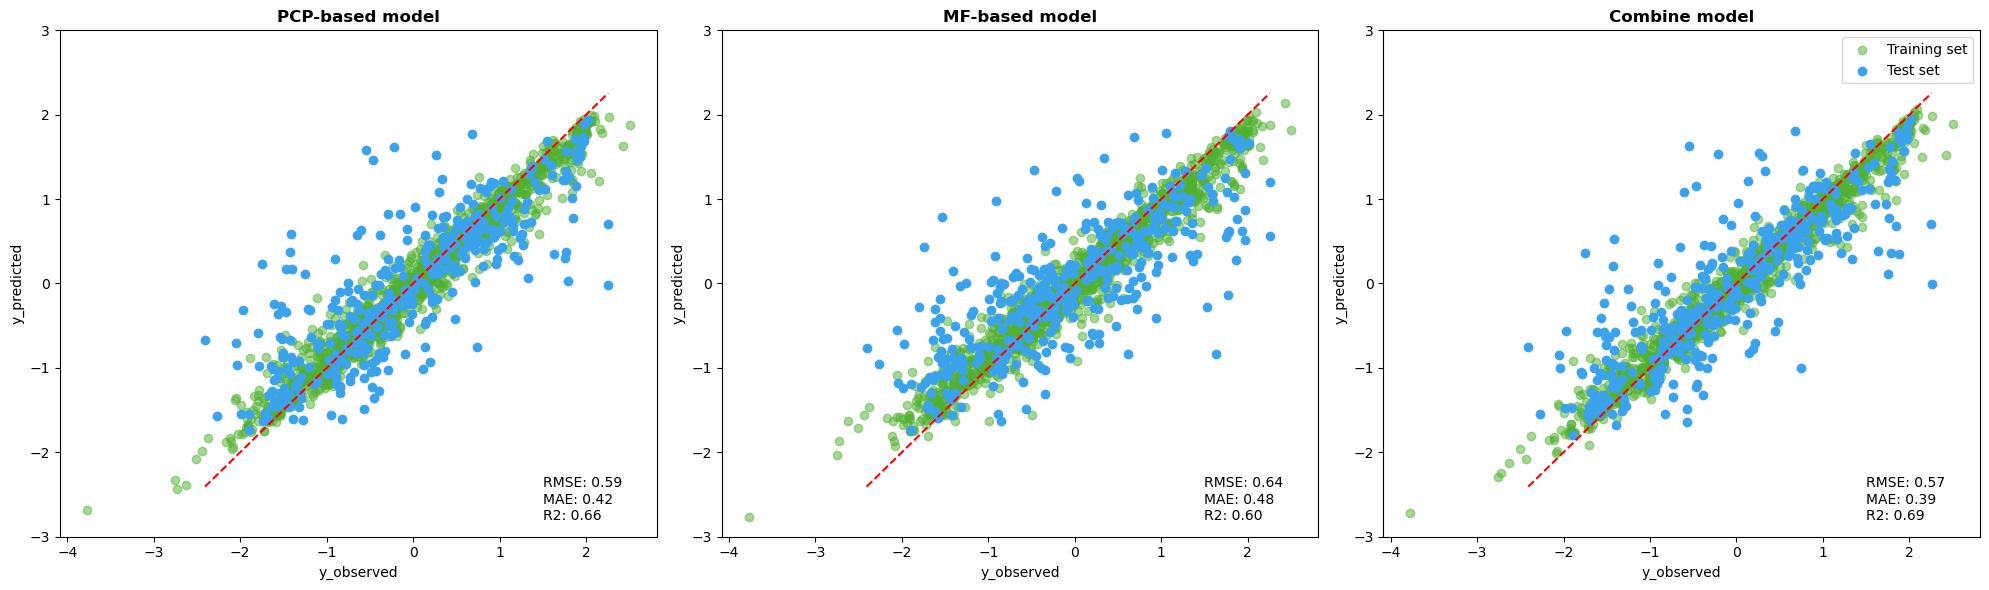

In [60]:
# Plot the descriptor based RF
fig, ax = plt.subplots(1,3, figsize = (20,6) )
ax[0].scatter(Y_train, rf_prediction_train_pcp, color = palette[2], label = 'Training set', alpha = 0.5)
ax[0].scatter(y_test, rf_prediction_test_pcp, color = palette[4], label = 'Test set')
ax[0].set_xlabel('y_observed')
ax[0].set_ylabel('y_predicted')
ax[0].set_title('PCP-based model', weight = "bold")
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
ax[0].text(1.5, -2.8, f'RMSE: {rf_pcp_RMSE:.2f}\nMAE: {rf_pcp_MAE:.2f}\nR2: {rf_pcp_R2:.2f}')
ax[0].set_ylim(-3, 3)

# Plot the optimal KNN
ax[1].scatter(Y_train_fp, rf_prediction_train_mf, color = palette[2], label = 'Training set', alpha = 0.5)
ax[1].scatter(y_test_fp, rf_prediction_test_mf, color = palette[4], label = 'Test set')
ax[1].set_xlabel('y_observed')
ax[1].set_ylabel('y_predicted')
ax[1].set_title('MF-based model', weight = "bold")
ax[1].plot([min(y_test_fp), max(y_test_fp)], [min(y_test_fp), max(y_test_fp)], color='red', linestyle='--')
ax[1].text(1.5, -2.8, f'RMSE: {rf_mf_RMSE:.2f}\nMAE: {rf_mf_MAE:.2f}\nR2: {rf_mf_R2:.2f}')
ax[1].set_ylim(-3, 3)

# Plot the optimal RF
ax[2].scatter(Y_train_combine, rf_prediction_train_combine, color = palette[2], label = 'Training set', alpha = 0.5)
ax[2].scatter(y_test_combine, rf_prediction_test_combine, color = palette[4], label = 'Test set')
ax[2].set_xlabel('y_observed')
ax[2].set_ylabel('y_predicted')
ax[2].set_title('Combine model', weight = "bold")
ax[2].plot([min(y_test_combine), max(y_test_combine)], [min(y_test_combine), max(y_test_combine)], color='red', linestyle='--')
ax[2].text(1.5, -2.8, f'RMSE: {rf_combine_RMSE:.2f}\nMAE: {rf_combine_MAE:.2f}\nR2: {rf_combine_R2:.2f}')
ax[2].set_ylim(-3, 3)

plt.legend()
plt.tight_layout()
plt.show()